In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from tqdm import tqdm 
tqdm.pandas()
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
import os
os.chdir('../')
from python_code import new_new_gibbs
os.chdir('notebooks')
from sklearn.decomposition import PCA
import pickle

In [2]:
pca = PCA(n_components=2)
df = pd.read_csv('../data/all_data.csv')
df = df.drop(columns='transit_stations_percent_change_from_baseline')
df = df.dropna()
df['department_name'] = df['department_name'].apply(lambda x: " ".join(x.split(' ')[:-1]))
X_transformed = pca.fit_transform(df[df.columns[np.r_[1:6]]])
df['component_1'] = X_transformed[:,0]
df['component_2'] = X_transformed[:,1]
df['intercept'] = 1
grouped_df = df.groupby('department_name')
groups = list(grouped_df.groups.keys())
X_depts, y_depts = [], []
pca = PCA(n_components=2)
time_vecs = []
date_vecs = []
for n, dept in enumerate(groups):
    df_dept = grouped_df.get_group(dept)
    df_dept = df_dept.sort_values('date')
    date_vecs.append(df_dept['date'])
    X = df_dept[['intercept','component_1','component_2']].to_numpy()
    y = df_dept['incidents'].to_numpy()
    X_depts.append(X)
    y_depts.append(y.flatten())
    df_dept['day_of_the_year'] = pd.to_datetime(df_dept['date']).dt.day_of_year
    time_vecs.append(df_dept['day_of_the_year'].to_numpy())

In [3]:
gb = new_new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=100000, burn=0, bandwidth_start=30, tau_sq_1_start=50, f_start=-5, sigmas_start=25, sigmas_proposal=[2,2])
gb.fit()
with open(f'traces1.pickle', 'wb') as handle:
    pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)
        

  0%|                                                                                                                                                                                      | 1/100000 [00:00<16:27:11,  1.69it/s]/Users/juliette/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
  1%|██▎                                                                                                                                                                                 | 1258/100000 [06:43<6:50:39,  4.01it/s]

pb


  1%|██▎                                                                                                                                                                                 | 1291/100000 [06:54<7:07:11,  3.85it/s]

pb


  1%|██▎                                                                                                                                                                                 | 1294/100000 [06:55<6:30:01,  4.22it/s]

pb


  1%|██▍                                                                                                                                                                                 | 1347/100000 [07:11<9:59:55,  2.74it/s]

pb


  1%|██▍                                                                                                                                                                                 | 1354/100000 [07:13<7:53:59,  3.47it/s]

pb


  1%|██▍                                                                                                                                                                                 | 1357/100000 [07:14<8:23:54,  3.26it/s]

pb


  1%|██▌                                                                                                                                                                                 | 1456/100000 [07:45<8:00:07,  3.42it/s]

pb


  1%|██▋                                                                                                                                                                                 | 1474/100000 [07:50<8:30:09,  3.22it/s]

pb


  1%|██▋                                                                                                                                                                                 | 1498/100000 [07:59<7:33:45,  3.62it/s]

pb


  2%|██▋                                                                                                                                                                                 | 1507/100000 [08:01<6:56:02,  3.95it/s]

pb


  2%|██▉                                                                                                                                                                                 | 1600/100000 [08:30<6:38:47,  4.11it/s]

pb


  3%|████▌                                                                                                                                                                               | 2538/100000 [13:33<8:26:31,  3.21it/s]

pb


  3%|████▋                                                                                                                                                                               | 2582/100000 [13:46<7:57:50,  3.40it/s]

pb


  3%|████▋                                                                                                                                                                               | 2607/100000 [13:53<6:27:41,  4.19it/s]

pb


  3%|████▊                                                                                                                                                                               | 2652/100000 [14:06<5:27:35,  4.95it/s]

pb
pb


  3%|████▊                                                                                                                                                                               | 2677/100000 [14:14<8:20:00,  3.24it/s]

pb


  3%|████▊                                                                                                                                                                               | 2707/100000 [14:23<8:05:38,  3.34it/s]

pb


  7%|████████████▊                                                                                                                                                                       | 7123/100000 [38:48<7:12:22,  3.58it/s]

pb


  8%|██████████████▏                                                                                                                                                                     | 7873/100000 [43:10<7:11:57,  3.55it/s]

pb


  8%|██████████████▊                                                                                                                                                                     | 8223/100000 [45:13<7:04:44,  3.60it/s]

pb


  8%|██████████████▊                                                                                                                                                                     | 8225/100000 [45:13<6:08:30,  4.15it/s]

pb


  8%|███████████████                                                                                                                                                                     | 8348/100000 [45:56<7:01:54,  3.62it/s]

pb


  9%|███████████████▌                                                                                                                                                                    | 8628/100000 [47:33<6:43:40,  3.77it/s]

pb


  9%|███████████████▊                                                                                                                                                                    | 8797/100000 [48:29<6:31:39,  3.88it/s]

pb


  9%|████████████████▎                                                                                                                                                                   | 9037/100000 [49:44<7:47:55,  3.24it/s]

pb


  9%|████████████████▎                                                                                                                                                                   | 9090/100000 [50:00<7:44:25,  3.26it/s]

pb


  9%|████████████████▍                                                                                                                                                                   | 9110/100000 [50:06<7:52:08,  3.21it/s]

pb


 10%|██████████████████▋                                                                                                                                                                | 10426/100000 [57:03<6:24:14,  3.89it/s]

pb


 11%|███████████████████▍                                                                                                                                                             | 10986/100000 [1:00:07<6:25:38,  3.85it/s]

pb


 11%|████████████████████                                                                                                                                                             | 11369/100000 [1:02:13<7:51:24,  3.13it/s]

pb


 12%|█████████████████████▋                                                                                                                                                           | 12256/100000 [1:07:12<6:38:07,  3.67it/s]

pb


 13%|██████████████████████▎                                                                                                                                                          | 12581/100000 [1:09:04<6:36:04,  3.68it/s]

pb


 20%|███████████████████████████████████▌                                                                                                                                             | 20057/100000 [1:51:22<7:30:37,  2.96it/s]

pb


 20%|███████████████████████████████████▌                                                                                                                                             | 20080/100000 [1:51:30<7:33:15,  2.94it/s]

pb


 20%|███████████████████████████████████▌                                                                                                                                             | 20091/100000 [1:51:33<7:30:42,  2.95it/s]

pb


 20%|███████████████████████████████████▋                                                                                                                                             | 20184/100000 [1:52:04<7:37:08,  2.91it/s]

pb


 20%|███████████████████████████████████▋                                                                                                                                             | 20195/100000 [1:52:08<7:13:26,  3.07it/s]

pb


 21%|████████████████████████████████████▋                                                                                                                                            | 20710/100000 [1:55:01<7:15:56,  3.03it/s]

pb


 21%|█████████████████████████████████████                                                                                                                                            | 20931/100000 [1:56:18<7:31:29,  2.92it/s]

pb


 21%|█████████████████████████████████████                                                                                                                                            | 20939/100000 [1:56:20<7:12:45,  3.04it/s]

pb


 21%|█████████████████████████████████████▎                                                                                                                                           | 21051/100000 [1:56:58<7:30:46,  2.92it/s]

pb


 21%|█████████████████████████████████████▍                                                                                                                                           | 21170/100000 [1:57:39<7:28:00,  2.93it/s]

pb


 21%|█████████████████████████████████████▋                                                                                                                                           | 21263/100000 [1:58:10<7:33:23,  2.89it/s]

pb


 21%|█████████████████████████████████████▋                                                                                                                                           | 21265/100000 [1:58:10<5:47:57,  3.77it/s]

pb


 21%|█████████████████████████████████████▋                                                                                                                                           | 21267/100000 [1:58:11<4:55:44,  4.44it/s]

pb


 21%|█████████████████████████████████████▊                                                                                                                                           | 21335/100000 [1:58:33<7:18:55,  2.99it/s]

pb


 21%|█████████████████████████████████████▊                                                                                                                                           | 21368/100000 [1:58:44<7:41:16,  2.84it/s]

pb


 21%|█████████████████████████████████████▉                                                                                                                                           | 21446/100000 [1:59:11<7:27:35,  2.93it/s]

pb


 22%|██████████████████████████████████████▏                                                                                                                                          | 21570/100000 [1:59:53<7:35:38,  2.87it/s]

pb


 22%|██████████████████████████████████████▎                                                                                                                                          | 21614/100000 [2:00:08<7:19:18,  2.97it/s]

pb


 22%|██████████████████████████████████████▊                                                                                                                                          | 21924/100000 [2:01:53<7:34:27,  2.86it/s]

pb


 22%|██████████████████████████████████████▊                                                                                                                                          | 21947/100000 [2:02:01<7:26:25,  2.91it/s]

pb


 22%|██████████████████████████████████████▊                                                                                                                                          | 21950/100000 [2:02:01<6:08:57,  3.53it/s]

pb
pb


 22%|██████████████████████████████████████▉                                                                                                                                          | 22012/100000 [2:02:22<7:16:15,  2.98it/s]

pb


 22%|███████████████████████████████████████▎                                                                                                                                         | 22203/100000 [2:03:27<7:34:15,  2.85it/s]

pb


 22%|███████████████████████████████████████▍                                                                                                                                         | 22275/100000 [2:03:51<7:20:01,  2.94it/s]

pb


 22%|███████████████████████████████████████▌                                                                                                                                         | 22320/100000 [2:04:06<7:13:12,  2.99it/s]

pb


 22%|███████████████████████████████████████▋                                                                                                                                         | 22388/100000 [2:04:29<7:26:03,  2.90it/s]

pb


 22%|███████████████████████████████████████▋                                                                                                                                         | 22398/100000 [2:04:33<7:24:35,  2.91it/s]

pb


 22%|███████████████████████████████████████▋                                                                                                                                         | 22422/100000 [2:04:41<7:28:47,  2.88it/s]

pb


 22%|███████████████████████████████████████▋                                                                                                                                         | 22451/100000 [2:04:50<7:28:05,  2.88it/s]

pb


 23%|███████████████████████████████████████▊                                                                                                                                         | 22505/100000 [2:05:09<7:15:39,  2.96it/s]

pb


 23%|█████████████████████████████████████████▎                                                                                                                                       | 23346/100000 [2:09:57<7:11:14,  2.96it/s]

pb


 23%|█████████████████████████████████████████▍                                                                                                                                       | 23394/100000 [2:10:13<7:11:17,  2.96it/s]

pb


 23%|█████████████████████████████████████████▍                                                                                                                                       | 23423/100000 [2:10:23<7:18:14,  2.91it/s]

pb


 24%|██████████████████████████████████████████▎                                                                                                                                      | 23933/100000 [2:13:19<7:04:35,  2.99it/s]

pb


 24%|██████████████████████████████████████████▌                                                                                                                                      | 24045/100000 [2:13:57<7:09:03,  2.95it/s]

pb


 24%|██████████████████████████████████████████▋                                                                                                                                      | 24114/100000 [2:14:20<7:25:42,  2.84it/s]

pb


 24%|██████████████████████████████████████████▋                                                                                                                                      | 24120/100000 [2:14:22<6:53:50,  3.06it/s]

pb


 24%|██████████████████████████████████████████▉                                                                                                                                      | 24282/100000 [2:15:17<7:06:21,  2.96it/s]

pb


 24%|███████████████████████████████████████████▏                                                                                                                                     | 24421/100000 [2:16:04<7:19:46,  2.86it/s]

pb


 24%|███████████████████████████████████████████▏                                                                                                                                     | 24431/100000 [2:16:07<7:00:20,  3.00it/s]

pb


 25%|███████████████████████████████████████████▍                                                                                                                                     | 24507/100000 [2:16:33<7:15:03,  2.89it/s]

pb


 25%|███████████████████████████████████████████▌                                                                                                                                     | 24583/100000 [2:16:59<7:08:41,  2.93it/s]

pb


 25%|███████████████████████████████████████████▊                                                                                                                                     | 24782/100000 [2:18:07<7:10:50,  2.91it/s]

pb


 25%|███████████████████████████████████████████▉                                                                                                                                     | 24833/100000 [2:18:24<7:08:46,  2.92it/s]

pb


 25%|████████████████████████████████████████████▏                                                                                                                                    | 24947/100000 [2:19:02<7:14:19,  2.88it/s]

pb


 25%|████████████████████████████████████████████▏                                                                                                                                    | 24955/100000 [2:19:05<6:50:49,  3.04it/s]

pb


 25%|████████████████████████████████████████████▏                                                                                                                                    | 24992/100000 [2:19:17<7:03:05,  2.95it/s]

pb


 25%|████████████████████████████████████████████▏                                                                                                                                    | 24995/100000 [2:19:18<5:54:53,  3.52it/s]

pb


 25%|████████████████████████████████████████████▎                                                                                                                                    | 25007/100000 [2:19:22<7:18:33,  2.85it/s]

pb


 25%|████████████████████████████████████████████▎                                                                                                                                    | 25055/100000 [2:19:38<7:12:30,  2.89it/s]

pb


 25%|████████████████████████████████████████████▎                                                                                                                                    | 25069/100000 [2:19:43<7:01:38,  2.96it/s]

pb


 25%|████████████████████████████████████████████▍                                                                                                                                    | 25094/100000 [2:19:51<7:11:39,  2.89it/s]

pb


 25%|████████████████████████████████████████████▌                                                                                                                                    | 25151/100000 [2:20:10<7:12:02,  2.89it/s]

pb


 25%|████████████████████████████████████████████▊                                                                                                                                    | 25306/100000 [2:21:03<7:04:04,  2.94it/s]

pb


 25%|████████████████████████████████████████████▉                                                                                                                                    | 25386/100000 [2:21:30<7:09:28,  2.90it/s]

pb


 25%|████████████████████████████████████████████▉                                                                                                                                    | 25388/100000 [2:21:30<5:29:34,  3.77it/s]

pb


 25%|████████████████████████████████████████████▉                                                                                                                                    | 25390/100000 [2:21:30<4:46:56,  4.33it/s]

pb


 25%|████████████████████████████████████████████▉                                                                                                                                    | 25406/100000 [2:21:36<7:05:40,  2.92it/s]

pb


 25%|█████████████████████████████████████████████                                                                                                                                    | 25446/100000 [2:21:49<6:53:44,  3.00it/s]

pb


 26%|█████████████████████████████████████████████▏                                                                                                                                   | 25553/100000 [2:22:25<7:00:36,  2.95it/s]

pb


 26%|█████████████████████████████████████████████▉                                                                                                                                   | 25986/100000 [2:24:55<7:06:33,  2.89it/s]

pb


 26%|██████████████████████████████████████████████                                                                                                                                   | 26007/100000 [2:25:01<7:06:33,  2.89it/s]

pb


 26%|██████████████████████████████████████████████                                                                                                                                   | 26017/100000 [2:25:04<6:53:52,  2.98it/s]

pb


 26%|██████████████████████████████████████████████▏                                                                                                                                  | 26101/100000 [2:25:33<6:53:13,  2.98it/s]

pb


 26%|██████████████████████████████████████████████▌                                                                                                                                  | 26280/100000 [2:26:34<6:58:38,  2.93it/s]

pb


 26%|██████████████████████████████████████████████▋                                                                                                                                  | 26362/100000 [2:27:01<6:59:47,  2.92it/s]

pb


 26%|██████████████████████████████████████████████▊                                                                                                                                  | 26440/100000 [2:27:28<7:03:40,  2.89it/s]

pb


 27%|██████████████████████████████████████████████▉                                                                                                                                  | 26548/100000 [2:28:07<6:54:13,  2.96it/s]

pb


 27%|███████████████████████████████████████████████                                                                                                                                  | 26603/100000 [2:28:25<7:01:07,  2.90it/s]

pb


 27%|███████████████████████████████████████████████▎                                                                                                                                 | 26714/100000 [2:29:03<6:49:26,  2.98it/s]

pb


 27%|███████████████████████████████████████████████▍                                                                                                                                 | 26773/100000 [2:29:23<6:53:01,  2.95it/s]

pb


 27%|███████████████████████████████████████████████▍                                                                                                                                 | 26815/100000 [2:29:37<7:20:17,  2.77it/s]

pb


 27%|███████████████████████████████████████████████▍                                                                                                                                 | 26823/100000 [2:29:39<6:50:13,  2.97it/s]

pb


 27%|███████████████████████████████████████████████▌                                                                                                                                 | 26901/100000 [2:30:05<6:54:59,  2.94it/s]

pb


 27%|███████████████████████████████████████████████▋                                                                                                                                 | 26933/100000 [2:30:16<6:58:11,  2.91it/s]

pb


 27%|███████████████████████████████████████████████▊                                                                                                                                 | 26979/100000 [2:30:31<6:53:55,  2.94it/s]

pb


 27%|███████████████████████████████████████████████▊                                                                                                                                 | 27002/100000 [2:30:39<6:43:22,  3.02it/s]

pb


 27%|███████████████████████████████████████████████▊                                                                                                                                 | 27022/100000 [2:30:45<6:49:28,  2.97it/s]

pb


 27%|███████████████████████████████████████████████▉                                                                                                                                 | 27068/100000 [2:31:01<6:47:38,  2.98it/s]

pb


 27%|████████████████████████████████████████████████                                                                                                                                 | 27183/100000 [2:31:40<6:59:18,  2.89it/s]

pb


 27%|████████████████████████████████████████████████                                                                                                                                 | 27186/100000 [2:31:41<5:44:28,  3.52it/s]

pb


 27%|████████████████████████████████████████████████▏                                                                                                                                | 27195/100000 [2:31:43<6:35:01,  3.07it/s]

pb


 27%|████████████████████████████████████████████████▏                                                                                                                                | 27204/100000 [2:31:46<6:37:56,  3.05it/s]

pb


 27%|████████████████████████████████████████████████▏                                                                                                                                | 27213/100000 [2:31:49<6:38:03,  3.05it/s]

pb


 27%|████████████████████████████████████████████████▏                                                                                                                                | 27235/100000 [2:31:56<6:47:55,  2.97it/s]

pb


 27%|████████████████████████████████████████████████▌                                                                                                                                | 27447/100000 [2:33:08<6:50:28,  2.95it/s]

pb


 28%|████████████████████████████████████████████████▋                                                                                                                                | 27500/100000 [2:33:25<7:03:22,  2.85it/s]

pb


 28%|████████████████████████████████████████████████▊                                                                                                                                | 27567/100000 [2:33:48<7:04:17,  2.85it/s]

pb


 28%|████████████████████████████████████████████████▊                                                                                                                                | 27585/100000 [2:33:54<6:50:51,  2.94it/s]

pb


 28%|████████████████████████████████████████████████▉                                                                                                                                | 27623/100000 [2:34:07<6:38:39,  3.03it/s]

pb


 28%|████████████████████████████████████████████████▉                                                                                                                                | 27636/100000 [2:34:11<6:42:36,  3.00it/s]

pb


 28%|████████████████████████████████████████████████▉                                                                                                                                | 27639/100000 [2:34:12<5:33:16,  3.62it/s]

pb


 28%|█████████████████████████████████████████████████                                                                                                                                | 27708/100000 [2:34:35<6:54:25,  2.91it/s]

pb


 28%|█████████████████████████████████████████████████▏                                                                                                                               | 27757/100000 [2:34:51<6:46:58,  2.96it/s]

pb


 28%|█████████████████████████████████████████████████▏                                                                                                                               | 27761/100000 [2:34:52<5:54:14,  3.40it/s]

pb


 28%|█████████████████████████████████████████████████▏                                                                                                                               | 27812/100000 [2:35:09<6:46:47,  2.96it/s]

pb


 28%|█████████████████████████████████████████████████▏                                                                                                                               | 27815/100000 [2:35:10<5:42:03,  3.52it/s]

pb


 28%|█████████████████████████████████████████████████▏                                                                                                                               | 27818/100000 [2:35:10<5:11:51,  3.86it/s]

pb


 28%|█████████████████████████████████████████████████▌                                                                                                                               | 27986/100000 [2:36:08<6:41:35,  2.99it/s]

pb


 28%|█████████████████████████████████████████████████▋                                                                                                                               | 28037/100000 [2:36:25<7:38:50,  2.61it/s]

pb


 28%|█████████████████████████████████████████████████▊                                                                                                                               | 28169/100000 [2:37:11<6:43:27,  2.97it/s]

pb


 28%|█████████████████████████████████████████████████▉                                                                                                                               | 28203/100000 [2:37:22<6:37:24,  3.01it/s]

pb


 28%|█████████████████████████████████████████████████▉                                                                                                                               | 28212/100000 [2:37:25<7:12:29,  2.77it/s]

pb


 28%|██████████████████████████████████████████████████                                                                                                                               | 28270/100000 [2:37:45<6:51:55,  2.90it/s]

pb


 28%|██████████████████████████████████████████████████                                                                                                                               | 28272/100000 [2:37:45<5:20:50,  3.73it/s]

pb
pb


 28%|██████████████████████████████████████████████████                                                                                                                               | 28309/100000 [2:37:57<6:37:57,  3.00it/s]

pb


 28%|██████████████████████████████████████████████████▏                                                                                                                              | 28346/100000 [2:38:10<7:26:24,  2.68it/s]

pb


 28%|██████████████████████████████████████████████████▎                                                                                                                              | 28419/100000 [2:38:34<6:43:16,  2.96it/s]

pb


 28%|██████████████████████████████████████████████████▍                                                                                                                              | 28488/100000 [2:38:57<6:42:02,  2.96it/s]

pb


 29%|███████████████████████████████████████████████████▎                                                                                                                             | 29004/100000 [2:41:54<6:49:19,  2.89it/s]

pb


 29%|███████████████████████████████████████████████████▍                                                                                                                             | 29068/100000 [2:42:15<6:47:10,  2.90it/s]

pb


 29%|███████████████████████████████████████████████████▌                                                                                                                             | 29156/100000 [2:42:45<6:38:55,  2.96it/s]

pb


 29%|███████████████████████████████████████████████████▌                                                                                                                             | 29158/100000 [2:42:45<5:07:10,  3.84it/s]

pb


 29%|███████████████████████████████████████████████████▌                                                                                                                             | 29161/100000 [2:42:46<5:08:05,  3.83it/s]

pb


 29%|███████████████████████████████████████████████████▊                                                                                                                             | 29293/100000 [2:43:31<6:40:33,  2.94it/s]

pb


 29%|███████████████████████████████████████████████████▉                                                                                                                             | 29333/100000 [2:43:44<6:44:51,  2.91it/s]

pb


 29%|████████████████████████████████████████████████████                                                                                                                             | 29387/100000 [2:44:02<6:41:44,  2.93it/s]

pb


 29%|████████████████████████████████████████████████████                                                                                                                             | 29444/100000 [2:44:21<6:33:08,  2.99it/s]

pb


 29%|████████████████████████████████████████████████████                                                                                                                             | 29448/100000 [2:44:22<5:44:45,  3.41it/s]

pb


 29%|████████████████████████████████████████████████████▏                                                                                                                            | 29453/100000 [2:44:24<5:50:56,  3.35it/s]

pb


 30%|████████████████████████████████████████████████████▍                                                                                                                            | 29630/100000 [2:45:25<6:41:24,  2.92it/s]

pb


 30%|████████████████████████████████████████████████████▍                                                                                                                            | 29635/100000 [2:45:27<6:09:04,  3.18it/s]

pb


 30%|████████████████████████████████████████████████████▊                                                                                                                            | 29836/100000 [2:46:35<6:45:48,  2.88it/s]

pb


 30%|████████████████████████████████████████████████████▊                                                                                                                            | 29851/100000 [2:46:40<5:45:53,  3.38it/s]

pb


 30%|████████████████████████████████████████████████████▊                                                                                                                            | 29869/100000 [2:46:46<7:12:32,  2.70it/s]

pb


 30%|█████████████████████████████████████████████████████▏                                                                                                                           | 30018/100000 [2:47:37<5:53:24,  3.30it/s]

pb


 30%|█████████████████████████████████████████████████████▏                                                                                                                           | 30047/100000 [2:47:47<5:44:55,  3.38it/s]

pb


 30%|█████████████████████████████████████████████████████▏                                                                                                                           | 30056/100000 [2:47:50<5:43:01,  3.40it/s]

pb


 30%|█████████████████████████████████████████████████████▏                                                                                                                           | 30060/100000 [2:47:51<6:22:19,  3.05it/s]

pb


 30%|█████████████████████████████████████████████████████▎                                                                                                                           | 30085/100000 [2:48:00<5:42:34,  3.40it/s]

pb


 30%|█████████████████████████████████████████████████████▎                                                                                                                           | 30145/100000 [2:48:20<6:44:55,  2.88it/s]

pb


 30%|█████████████████████████████████████████████████████▍                                                                                                                           | 30169/100000 [2:48:28<6:40:34,  2.91it/s]

pb


 30%|█████████████████████████████████████████████████████▌                                                                                                                           | 30233/100000 [2:48:50<5:36:10,  3.46it/s]

pb


 30%|█████████████████████████████████████████████████████▌                                                                                                                           | 30244/100000 [2:48:53<5:34:52,  3.47it/s]

pb


 30%|█████████████████████████████████████████████████████▌                                                                                                                           | 30247/100000 [2:48:54<5:15:53,  3.68it/s]

pb


 30%|█████████████████████████████████████████████████████▌                                                                                                                           | 30259/100000 [2:48:58<6:27:19,  3.00it/s]

pb


 30%|█████████████████████████████████████████████████████▋                                                                                                                           | 30315/100000 [2:49:17<6:33:20,  2.95it/s]

pb


 30%|█████████████████████████████████████████████████████▊                                                                                                                           | 30381/100000 [2:49:39<5:41:14,  3.40it/s]

pb


 30%|█████████████████████████████████████████████████████▊                                                                                                                           | 30383/100000 [2:49:39<5:07:09,  3.78it/s]

pb


 30%|█████████████████████████████████████████████████████▊                                                                                                                           | 30405/100000 [2:49:47<6:37:18,  2.92it/s]

pb


 30%|█████████████████████████████████████████████████████▊                                                                                                                           | 30410/100000 [2:49:48<5:55:06,  3.27it/s]

pb


 30%|█████████████████████████████████████████████████████▊                                                                                                                           | 30420/100000 [2:49:51<6:24:41,  3.01it/s]

pb


 30%|█████████████████████████████████████████████████████▉                                                                                                                           | 30477/100000 [2:50:10<5:39:13,  3.42it/s]

pb


 30%|█████████████████████████████████████████████████████▉                                                                                                                           | 30495/100000 [2:50:16<6:35:08,  2.93it/s]

pb


 31%|█████████████████████████████████████████████████████▉                                                                                                                           | 30503/100000 [2:50:19<6:13:22,  3.10it/s]

pb


 31%|█████████████████████████████████████████████████████▉                                                                                                                           | 30505/100000 [2:50:19<4:54:36,  3.93it/s]

pb


 31%|██████████████████████████████████████████████████████                                                                                                                           | 30521/100000 [2:50:24<4:49:10,  4.00it/s]

pb
pb


 31%|██████████████████████████████████████████████████████                                                                                                                           | 30530/100000 [2:50:27<6:34:34,  2.93it/s]

pb


 31%|██████████████████████████████████████████████████████                                                                                                                           | 30549/100000 [2:50:33<6:38:15,  2.91it/s]

pb


 31%|██████████████████████████████████████████████████████▎                                                                                                                          | 30676/100000 [2:51:16<6:31:48,  2.95it/s]

pb
pb


 31%|██████████████████████████████████████████████████████▍                                                                                                                          | 30756/100000 [2:51:43<6:34:26,  2.93it/s]

pb


 31%|██████████████████████████████████████████████████████▍                                                                                                                          | 30765/100000 [2:51:46<5:25:19,  3.55it/s]

pb


 31%|██████████████████████████████████████████████████████▍                                                                                                                          | 30767/100000 [2:51:46<4:58:38,  3.86it/s]

pb


 31%|██████████████████████████████████████████████████████▌                                                                                                                          | 30800/100000 [2:51:58<6:25:59,  2.99it/s]

pb


 31%|██████████████████████████████████████████████████████▌                                                                                                                          | 30849/100000 [2:52:14<6:33:40,  2.93it/s]

pb


 31%|██████████████████████████████████████████████████████▋                                                                                                                          | 30865/100000 [2:52:19<6:29:18,  2.96it/s]

pb


 31%|██████████████████████████████████████████████████████▋                                                                                                                          | 30901/100000 [2:52:31<6:30:13,  2.95it/s]

pb


 31%|██████████████████████████████████████████████████████▊                                                                                                                          | 30965/100000 [2:52:53<5:25:34,  3.53it/s]

pb


 31%|██████████████████████████████████████████████████████▊                                                                                                                          | 30986/100000 [2:53:00<6:36:05,  2.90it/s]

pb


 31%|██████████████████████████████████████████████████████▉                                                                                                                          | 31045/100000 [2:53:20<6:47:23,  2.82it/s]

pb


 31%|███████████████████████████████████████████████████████                                                                                                                          | 31097/100000 [2:53:37<5:49:36,  3.28it/s]

pb


 31%|███████████████████████████████████████████████████████▏                                                                                                                         | 31183/100000 [2:54:07<6:15:25,  3.06it/s]

pb


 31%|███████████████████████████████████████████████████████▏                                                                                                                         | 31190/100000 [2:54:09<6:12:11,  3.08it/s]

pb


 31%|███████████████████████████████████████████████████████▎                                                                                                                         | 31247/100000 [2:54:29<6:25:04,  2.98it/s]

pb


 31%|███████████████████████████████████████████████████████▎                                                                                                                         | 31254/100000 [2:54:31<6:14:56,  3.06it/s]

pb


 31%|███████████████████████████████████████████████████████▍                                                                                                                         | 31291/100000 [2:54:43<6:32:58,  2.91it/s]

pb


 31%|███████████████████████████████████████████████████████▍                                                                                                                         | 31313/100000 [2:54:50<5:40:32,  3.36it/s]

pb


 31%|███████████████████████████████████████████████████████▍                                                                                                                         | 31339/100000 [2:54:59<6:29:20,  2.94it/s]

pb


 31%|███████████████████████████████████████████████████████▍                                                                                                                         | 31348/100000 [2:55:02<6:20:09,  3.01it/s]

pb


 31%|███████████████████████████████████████████████████████▌                                                                                                                         | 31383/100000 [2:55:13<5:36:10,  3.40it/s]

pb


 31%|███████████████████████████████████████████████████████▌                                                                                                                         | 31386/100000 [2:55:14<6:09:26,  3.10it/s]

pb


 31%|███████████████████████████████████████████████████████▋                                                                                                                         | 31428/100000 [2:55:29<6:36:50,  2.88it/s]

pb


 31%|███████████████████████████████████████████████████████▋                                                                                                                         | 31432/100000 [2:55:30<5:47:49,  3.29it/s]

pb


 32%|███████████████████████████████████████████████████████▊                                                                                                                         | 31548/100000 [2:56:09<5:29:47,  3.46it/s]

pb


 32%|███████████████████████████████████████████████████████▊                                                                                                                         | 31552/100000 [2:56:10<6:12:20,  3.06it/s]

pb


 32%|███████████████████████████████████████████████████████▉                                                                                                                         | 31572/100000 [2:56:17<5:41:53,  3.34it/s]

pb


 32%|████████████████████████████████████████████████████████                                                                                                                         | 31661/100000 [2:56:47<5:39:07,  3.36it/s]

pb


 32%|████████████████████████████████████████████████████████                                                                                                                         | 31670/100000 [2:56:50<6:21:11,  2.99it/s]

pb


 32%|████████████████████████████████████████████████████████▏                                                                                                                        | 31724/100000 [2:57:08<5:27:24,  3.48it/s]

pb


 32%|████████████████████████████████████████████████████████▎                                                                                                                        | 31793/100000 [2:57:32<5:34:10,  3.40it/s]

pb


 32%|████████████████████████████████████████████████████████▎                                                                                                                        | 31833/100000 [2:57:46<5:26:45,  3.48it/s]

pb


 32%|████████████████████████████████████████████████████████▍                                                                                                                        | 31877/100000 [2:58:01<6:20:24,  2.98it/s]

pb


 32%|████████████████████████████████████████████████████████▌                                                                                                                        | 31984/100000 [2:58:37<6:28:36,  2.92it/s]

pb


 32%|████████████████████████████████████████████████████████▋                                                                                                                        | 32002/100000 [2:58:43<6:24:21,  2.95it/s]

pb
pb
pb


 32%|████████████████████████████████████████████████████████▋                                                                                                                        | 32017/100000 [2:58:47<5:26:06,  3.47it/s]

pb


 32%|████████████████████████████████████████████████████████▋                                                                                                                        | 32040/100000 [2:58:55<6:29:09,  2.91it/s]

pb


 32%|████████████████████████████████████████████████████████▋                                                                                                                        | 32057/100000 [2:59:00<5:36:51,  3.36it/s]

pb


 32%|████████████████████████████████████████████████████████▊                                                                                                                        | 32086/100000 [2:59:10<6:27:45,  2.92it/s]

pb


 32%|████████████████████████████████████████████████████████▉                                                                                                                        | 32153/100000 [2:59:34<6:33:06,  2.88it/s]

pb


 32%|█████████████████████████████████████████████████████████                                                                                                                        | 32251/100000 [3:00:08<5:42:31,  3.30it/s]

pb


 32%|█████████████████████████████████████████████████████████                                                                                                                        | 32266/100000 [3:00:13<5:22:57,  3.50it/s]

pb


 32%|█████████████████████████████████████████████████████████▏                                                                                                                       | 32287/100000 [3:00:20<5:31:21,  3.41it/s]

pb


 32%|█████████████████████████████████████████████████████████▎                                                                                                                       | 32378/100000 [3:00:51<6:24:33,  2.93it/s]

pb


 32%|█████████████████████████████████████████████████████████▎                                                                                                                       | 32411/100000 [3:01:02<5:36:00,  3.35it/s]

pb


 32%|█████████████████████████████████████████████████████████▍                                                                                                                       | 32437/100000 [3:01:10<5:38:02,  3.33it/s]

pb


 32%|█████████████████████████████████████████████████████████▍                                                                                                                       | 32450/100000 [3:01:15<5:36:15,  3.35it/s]

pb


 32%|█████████████████████████████████████████████████████████▍                                                                                                                       | 32453/100000 [3:01:16<5:29:17,  3.42it/s]

pb


 32%|█████████████████████████████████████████████████████████▌                                                                                                                       | 32500/100000 [3:01:32<4:45:45,  3.94it/s]

pb
pb


 33%|█████████████████████████████████████████████████████████▌                                                                                                                       | 32509/100000 [3:01:35<6:23:44,  2.93it/s]

pb


 33%|█████████████████████████████████████████████████████████▌                                                                                                                       | 32542/100000 [3:01:46<6:25:53,  2.91it/s]

pb


 33%|█████████████████████████████████████████████████████████▌                                                                                                                       | 32556/100000 [3:01:50<5:32:32,  3.38it/s]

pb


 33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 32735/100000 [3:02:52<5:26:28,  3.43it/s]

pb


 33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 32747/100000 [3:02:56<6:26:20,  2.90it/s]

pb


 33%|█████████████████████████████████████████████████████████▉                                                                                                                       | 32768/100000 [3:03:03<6:37:39,  2.82it/s]

pb


 33%|██████████████████████████████████████████████████████████                                                                                                                       | 32780/100000 [3:03:06<5:34:00,  3.35it/s]

pb


 33%|██████████████████████████████████████████████████████████                                                                                                                       | 32806/100000 [3:03:15<6:36:57,  2.82it/s]

pb


 33%|██████████████████████████████████████████████████████████▏                                                                                                                      | 32874/100000 [3:03:39<6:32:26,  2.85it/s]

pb


 33%|██████████████████████████████████████████████████████████▎                                                                                                                      | 32937/100000 [3:04:00<6:20:14,  2.94it/s]

pb


 33%|██████████████████████████████████████████████████████████▎                                                                                                                      | 32968/100000 [3:04:10<5:33:22,  3.35it/s]

pb


 33%|██████████████████████████████████████████████████████████▍                                                                                                                      | 32996/100000 [3:04:20<6:22:52,  2.92it/s]

pb


 33%|██████████████████████████████████████████████████████████▍                                                                                                                      | 33043/100000 [3:04:36<6:18:10,  2.95it/s]

pb


 33%|██████████████████████████████████████████████████████████▌                                                                                                                      | 33056/100000 [3:04:40<6:26:28,  2.89it/s]

pb


 33%|██████████████████████████████████████████████████████████▌                                                                                                                      | 33088/100000 [3:04:51<5:31:50,  3.36it/s]

pb


 33%|██████████████████████████████████████████████████████████▌                                                                                                                      | 33093/100000 [3:04:52<6:13:23,  2.99it/s]

pb


 33%|██████████████████████████████████████████████████████████▌                                                                                                                      | 33116/100000 [3:05:00<5:29:53,  3.38it/s]

pb


 33%|██████████████████████████████████████████████████████████▋                                                                                                                      | 33138/100000 [3:05:07<5:27:01,  3.41it/s]

pb


 33%|██████████████████████████████████████████████████████████▋                                                                                                                      | 33141/100000 [3:05:08<5:55:44,  3.13it/s]

pb


 33%|██████████████████████████████████████████████████████████▋                                                                                                                      | 33152/100000 [3:05:12<6:13:10,  2.99it/s]

pb


 33%|██████████████████████████████████████████████████████████▋                                                                                                                      | 33180/100000 [3:05:21<6:21:57,  2.92it/s]

pb


 33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 33201/100000 [3:05:28<5:27:52,  3.40it/s]

pb


 33%|██████████████████████████████████████████████████████████▊                                                                                                                      | 33259/100000 [3:05:47<6:13:35,  2.98it/s]

pb


 33%|██████████████████████████████████████████████████████████▉                                                                                                                      | 33279/100000 [3:05:54<6:13:19,  2.98it/s]

pb


 33%|██████████████████████████████████████████████████████████▉                                                                                                                      | 33287/100000 [3:05:56<6:03:32,  3.06it/s]

pb


 33%|███████████████████████████████████████████████████████████                                                                                                                      | 33365/100000 [3:06:22<5:23:17,  3.44it/s]

pb


 33%|███████████████████████████████████████████████████████████                                                                                                                      | 33397/100000 [3:06:33<6:15:46,  2.95it/s]

pb


 33%|███████████████████████████████████████████████████████████                                                                                                                      | 33402/100000 [3:06:34<5:52:47,  3.15it/s]

pb


 33%|███████████████████████████████████████████████████████████▏                                                                                                                     | 33423/100000 [3:06:41<5:11:18,  3.56it/s]

pb


 33%|███████████████████████████████████████████████████████████▏                                                                                                                     | 33455/100000 [3:06:52<6:11:07,  2.99it/s]

pb


 34%|███████████████████████████████████████████████████████████▍                                                                                                                     | 33568/100000 [3:07:30<5:19:59,  3.46it/s]

pb


 34%|███████████████████████████████████████████████████████████▍                                                                                                                     | 33603/100000 [3:07:43<6:54:52,  2.67it/s]

pb


 34%|███████████████████████████████████████████████████████████▊                                                                                                                     | 33781/100000 [3:08:42<6:16:37,  2.93it/s]

pb


 34%|███████████████████████████████████████████████████████████▊                                                                                                                     | 33794/100000 [3:08:46<5:09:25,  3.57it/s]

pb


 34%|████████████████████████████████████████████████████████████                                                                                                                     | 33919/100000 [3:09:28<5:19:35,  3.45it/s]

pb


 34%|████████████████████████████████████████████████████████████▎                                                                                                                    | 34059/100000 [3:10:15<6:16:42,  2.92it/s]

pb


 34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 34215/100000 [3:11:07<6:05:38,  3.00it/s]

pb


 34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 34221/100000 [3:11:09<4:58:55,  3.67it/s]

pb


 34%|████████████████████████████████████████████████████████████▌                                                                                                                    | 34244/100000 [3:11:17<5:24:56,  3.37it/s]

pb


 34%|████████████████████████████████████████████████████████████▋                                                                                                                    | 34282/100000 [3:11:29<5:20:59,  3.41it/s]

pb


 34%|████████████████████████████████████████████████████████████▋                                                                                                                    | 34306/100000 [3:11:37<5:29:17,  3.33it/s]

pb


 34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 34325/100000 [3:11:44<6:03:36,  3.01it/s]

pb


 34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 34340/100000 [3:11:48<4:59:40,  3.65it/s]

pb


 34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 34346/100000 [3:11:50<5:55:36,  3.08it/s]

pb


 34%|████████████████████████████████████████████████████████████▊                                                                                                                    | 34375/100000 [3:11:59<6:04:02,  3.00it/s]

pb


 34%|█████████████████████████████████████████████████████████████                                                                                                                    | 34477/100000 [3:12:33<6:08:16,  2.97it/s]

pb


 34%|█████████████████████████████████████████████████████████████                                                                                                                    | 34489/100000 [3:12:37<5:11:03,  3.51it/s]

pb


 35%|█████████████████████████████████████████████████████████████                                                                                                                    | 34519/100000 [3:12:47<6:07:15,  2.97it/s]

pb


 35%|█████████████████████████████████████████████████████████████▏                                                                                                                   | 34535/100000 [3:12:52<5:15:43,  3.46it/s]

pb


 35%|█████████████████████████████████████████████████████████████▎                                                                                                                   | 34660/100000 [3:13:34<5:09:59,  3.51it/s]

pb


 35%|█████████████████████████████████████████████████████████████▍                                                                                                                   | 34701/100000 [3:13:48<6:08:32,  2.95it/s]

pb


 35%|█████████████████████████████████████████████████████████████▌                                                                                                                   | 34765/100000 [3:14:09<5:59:25,  3.03it/s]

pb
pb


 35%|█████████████████████████████████████████████████████████████▋                                                                                                                   | 34868/100000 [3:14:43<6:02:42,  2.99it/s]

pb


 35%|█████████████████████████████████████████████████████████████▊                                                                                                                   | 34952/100000 [3:15:13<6:03:35,  2.98it/s]

pb


 35%|██████████████████████████████████████████████████████████████                                                                                                                   | 35042/100000 [3:15:42<4:57:47,  3.64it/s]

pb


 35%|██████████████████████████████████████████████████████████████▏                                                                                                                  | 35146/100000 [3:16:17<5:09:46,  3.49it/s]

pb


 35%|██████████████████████████████████████████████████████████████▏                                                                                                                  | 35158/100000 [3:16:21<6:10:49,  2.91it/s]

pb


 35%|██████████████████████████████████████████████████████████████▎                                                                                                                  | 35195/100000 [3:16:33<6:07:23,  2.94it/s]

pb
pb


 35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 35258/100000 [3:16:54<6:03:43,  2.97it/s]

pb


 35%|██████████████████████████████████████████████████████████████▍                                                                                                                  | 35303/100000 [3:17:09<6:08:34,  2.93it/s]

pb


 35%|██████████████████████████████████████████████████████████████▌                                                                                                                  | 35335/100000 [3:17:19<6:05:46,  2.95it/s]

pb


 35%|██████████████████████████████████████████████████████████████▌                                                                                                                  | 35366/100000 [3:17:29<6:07:31,  2.93it/s]

pb


 35%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 35472/100000 [3:18:05<6:31:11,  2.75it/s]

pb


 36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 35510/100000 [3:18:18<5:08:48,  3.48it/s]

pb


 36%|██████████████████████████████████████████████████████████████▊                                                                                                                  | 35518/100000 [3:18:20<6:00:29,  2.98it/s]

pb


 36%|██████████████████████████████████████████████████████████████▉                                                                                                                  | 35523/100000 [3:18:22<5:36:31,  3.19it/s]

pb


 36%|███████████████████████████████████████████████████████████████                                                                                                                  | 35599/100000 [3:18:47<5:08:34,  3.48it/s]

pb


 36%|███████████████████████████████████████████████████████████████▏                                                                                                                 | 35685/100000 [3:19:17<6:08:12,  2.91it/s]

pb


 36%|███████████████████████████████████████████████████████████████▏                                                                                                                 | 35703/100000 [3:19:22<6:03:43,  2.95it/s]

pb


 36%|███████████████████████████████████████████████████████████████▏                                                                                                                 | 35716/100000 [3:19:26<5:26:44,  3.28it/s]

pb


 36%|███████████████████████████████████████████████████████████████▏                                                                                                                 | 35729/100000 [3:19:31<5:11:55,  3.43it/s]

pb


 36%|███████████████████████████████████████████████████████████████▍                                                                                                                 | 35867/100000 [3:20:17<5:14:38,  3.40it/s]

pb


 36%|███████████████████████████████████████████████████████████████▊                                                                                                                 | 36041/100000 [3:21:16<5:14:00,  3.39it/s]

pb


 36%|███████████████████████████████████████████████████████████████▉                                                                                                                 | 36111/100000 [3:21:41<6:12:08,  2.86it/s]

pb


 36%|████████████████████████████████████████████████████████████████▏                                                                                                                | 36239/100000 [3:22:24<6:04:30,  2.92it/s]

pb


 36%|████████████████████████████████████████████████████████████████▍                                                                                                                | 36373/100000 [3:23:09<5:09:44,  3.42it/s]

pb


 36%|████████████████████████████████████████████████████████████████▍                                                                                                                | 36391/100000 [3:23:15<5:08:19,  3.44it/s]

pb


 36%|████████████████████████████████████████████████████████████████▍                                                                                                                | 36408/100000 [3:23:21<5:57:29,  2.96it/s]

pb


 36%|████████████████████████████████████████████████████████████████▌                                                                                                                | 36496/100000 [3:23:51<5:12:21,  3.39it/s]

pb


 37%|████████████████████████████████████████████████████████████████▋                                                                                                                | 36535/100000 [3:24:04<6:26:34,  2.74it/s]

pb


 37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 36615/100000 [3:24:31<5:12:40,  3.38it/s]

pb


 37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 36625/100000 [3:24:35<5:08:34,  3.42it/s]

pb


 37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 36646/100000 [3:24:42<5:58:43,  2.94it/s]

pb


 37%|████████████████████████████████████████████████████████████████▊                                                                                                                | 36650/100000 [3:24:43<4:33:43,  3.86it/s]

pb


 37%|█████████████████████████████████████████████████████████████████                                                                                                                | 36780/100000 [3:25:28<6:01:04,  2.92it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 36945/100000 [3:26:25<6:31:00,  2.69it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 36991/100000 [3:26:40<6:04:39,  2.88it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▍                                                                                                               | 36994/100000 [3:26:41<4:31:34,  3.87it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▌                                                                                                               | 37034/100000 [3:26:54<5:18:27,  3.30it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▌                                                                                                               | 37068/100000 [3:27:06<5:04:30,  3.44it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▋                                                                                                               | 37125/100000 [3:27:26<6:54:59,  2.53it/s]

pb


 37%|█████████████████████████████████████████████████████████████████▊                                                                                                               | 37171/100000 [3:27:41<5:08:35,  3.39it/s]

pb


 37%|██████████████████████████████████████████████████████████████████                                                                                                               | 37349/100000 [3:28:42<5:49:51,  2.98it/s]

pb


 37%|██████████████████████████████████████████████████████████████████▏                                                                                                              | 37369/100000 [3:28:49<5:59:15,  2.91it/s]

pb


 37%|██████████████████████████████████████████████████████████████████▏                                                                                                              | 37372/100000 [3:28:49<4:12:53,  4.13it/s]

pb


 37%|██████████████████████████████████████████████████████████████████▏                                                                                                              | 37375/100000 [3:28:50<4:44:35,  3.67it/s]

pb


 37%|██████████████████████████████████████████████████████████████████▏                                                                                                              | 37395/100000 [3:28:58<6:54:24,  2.52it/s]

pb


 38%|██████████████████████████████████████████████████████████████████▌                                                                                                              | 37631/100000 [3:30:20<5:07:43,  3.38it/s]

pb


 38%|██████████████████████████████████████████████████████████████████▋                                                                                                              | 37689/100000 [3:30:40<5:16:11,  3.28it/s]

pb


 38%|██████████████████████████████████████████████████████████████████▊                                                                                                              | 37745/100000 [3:30:58<4:58:35,  3.47it/s]

pb


 38%|██████████████████████████████████████████████████████████████████▉                                                                                                              | 37796/100000 [3:31:16<5:04:50,  3.40it/s]

pb


 38%|███████████████████████████████████████████████████████████████████                                                                                                              | 37869/100000 [3:31:41<5:04:13,  3.40it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▏                                                                                                             | 37937/100000 [3:32:04<5:06:10,  3.38it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▍                                                                                                             | 38089/100000 [3:32:56<5:44:14,  3.00it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 38208/100000 [3:33:36<4:54:04,  3.50it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▋                                                                                                             | 38210/100000 [3:33:36<4:31:34,  3.79it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▊                                                                                                             | 38281/100000 [3:34:01<5:01:04,  3.42it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▊                                                                                                             | 38287/100000 [3:34:02<4:52:46,  3.51it/s]

pb


 38%|███████████████████████████████████████████████████████████████████▉                                                                                                             | 38349/100000 [3:34:24<5:52:00,  2.92it/s]

pb


 38%|████████████████████████████████████████████████████████████████████                                                                                                             | 38452/100000 [3:34:59<5:02:36,  3.39it/s]

pb


 38%|████████████████████████████████████████████████████████████████████                                                                                                             | 38461/100000 [3:35:02<5:47:31,  2.95it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▎                                                                                                            | 38617/100000 [3:35:55<5:46:23,  2.95it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▎                                                                                                            | 38625/100000 [3:35:58<5:54:57,  2.88it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▍                                                                                                            | 38650/100000 [3:36:06<5:57:05,  2.86it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▍                                                                                                            | 38682/100000 [3:36:17<5:46:55,  2.95it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▌                                                                                                            | 38754/100000 [3:36:41<5:50:24,  2.91it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▋                                                                                                            | 38775/100000 [3:36:47<4:53:38,  3.47it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▋                                                                                                            | 38795/100000 [3:36:54<5:48:56,  2.92it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▋                                                                                                            | 38814/100000 [3:37:01<5:53:11,  2.89it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▋                                                                                                            | 38818/100000 [3:37:01<4:22:00,  3.89it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▊                                                                                                            | 38850/100000 [3:37:12<4:58:32,  3.41it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▊                                                                                                            | 38902/100000 [3:37:31<5:51:18,  2.90it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▉                                                                                                            | 38948/100000 [3:37:46<5:50:01,  2.91it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▉                                                                                                            | 38951/100000 [3:37:47<4:50:24,  3.50it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▉                                                                                                            | 38969/100000 [3:37:53<4:59:30,  3.40it/s]

pb


 39%|████████████████████████████████████████████████████████████████████▉                                                                                                            | 38980/100000 [3:37:56<5:42:24,  2.97it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▏                                                                                                           | 39057/100000 [3:38:22<5:51:08,  2.89it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▏                                                                                                           | 39078/100000 [3:38:29<5:42:00,  2.97it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▎                                                                                                           | 39148/100000 [3:38:53<4:56:44,  3.42it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▎                                                                                                           | 39158/100000 [3:38:56<5:45:26,  2.94it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▌                                                                                                           | 39272/100000 [3:39:35<5:52:07,  2.87it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▌                                                                                                           | 39281/100000 [3:39:38<5:40:37,  2.97it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▌                                                                                                           | 39291/100000 [3:39:41<5:37:11,  3.00it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▊                                                                                                           | 39413/100000 [3:40:23<5:48:49,  2.89it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▊                                                                                                           | 39449/100000 [3:40:36<5:17:10,  3.18it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▊                                                                                                           | 39470/100000 [3:40:43<5:48:50,  2.89it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 39489/100000 [3:40:49<5:02:38,  3.33it/s]

pb


 39%|█████████████████████████████████████████████████████████████████████▉                                                                                                           | 39492/100000 [3:40:50<5:31:39,  3.04it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▏                                                                                                          | 39653/100000 [3:41:45<4:58:20,  3.37it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▏                                                                                                          | 39662/100000 [3:41:48<4:54:03,  3.42it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▏                                                                                                          | 39676/100000 [3:41:52<4:49:17,  3.48it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▎                                                                                                          | 39751/100000 [3:42:18<6:34:03,  2.55it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                          | 39762/100000 [3:42:22<6:12:00,  2.70it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                          | 39769/100000 [3:42:24<5:05:32,  3.29it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                          | 39804/100000 [3:42:37<4:51:51,  3.44it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                          | 39806/100000 [3:42:37<4:22:14,  3.83it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▌                                                                                                          | 39865/100000 [3:42:58<5:49:05,  2.87it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▋                                                                                                          | 39958/100000 [3:43:30<5:53:19,  2.83it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 40008/100000 [3:43:47<5:40:59,  2.93it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▉                                                                                                          | 40052/100000 [3:44:02<4:51:56,  3.42it/s]

pb


 40%|██████████████████████████████████████████████████████████████████████▉                                                                                                          | 40105/100000 [3:44:20<5:51:24,  2.84it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▎                                                                                                         | 40282/100000 [3:45:20<4:56:22,  3.36it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▎                                                                                                         | 40290/100000 [3:45:23<4:51:35,  3.41it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▍                                                                                                         | 40326/100000 [3:45:35<4:52:20,  3.40it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▍                                                                                                         | 40335/100000 [3:45:38<6:00:18,  2.76it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▍                                                                                                         | 40371/100000 [3:45:50<4:50:23,  3.42it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▌                                                                                                         | 40445/100000 [3:46:16<5:42:44,  2.90it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▌                                                                                                         | 40451/100000 [3:46:17<4:35:56,  3.60it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▌                                                                                                         | 40454/100000 [3:46:18<4:23:25,  3.77it/s]

pb


 40%|███████████████████████████████████████████████████████████████████████▋                                                                                                         | 40468/100000 [3:46:23<5:36:53,  2.95it/s]

pb


 41%|███████████████████████████████████████████████████████████████████████▊                                                                                                         | 40541/100000 [3:46:48<5:45:24,  2.87it/s]

pb


 41%|███████████████████████████████████████████████████████████████████████▉                                                                                                         | 40617/100000 [3:47:14<5:40:51,  2.90it/s]

pb


 41%|███████████████████████████████████████████████████████████████████████▉                                                                                                         | 40625/100000 [3:47:17<5:27:11,  3.02it/s]

pb


 41%|███████████████████████████████████████████████████████████████████████▉                                                                                                         | 40637/100000 [3:47:20<4:46:54,  3.45it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████                                                                                                         | 40719/100000 [3:47:49<4:45:07,  3.47it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████                                                                                                         | 40729/100000 [3:47:52<5:40:50,  2.90it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████                                                                                                         | 40740/100000 [3:47:56<5:34:34,  2.95it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 40795/100000 [3:48:15<5:53:23,  2.79it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▏                                                                                                        | 40816/100000 [3:48:21<4:50:00,  3.40it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▎                                                                                                        | 40861/100000 [3:48:37<5:40:32,  2.89it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▍                                                                                                        | 40959/100000 [3:49:10<5:43:51,  2.86it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▌                                                                                                        | 40979/100000 [3:49:17<5:40:55,  2.89it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▌                                                                                                        | 40983/100000 [3:49:18<4:18:07,  3.81it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▋                                                                                                        | 41033/100000 [3:49:35<5:36:59,  2.92it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▋                                                                                                        | 41038/100000 [3:49:37<5:29:24,  2.98it/s]

pb


 41%|████████████████████████████████████████████████████████████████████████▋                                                                                                        | 41095/100000 [3:49:56<5:38:29,  2.90it/s]

pb


 41%|█████████████████████████████████████████████████████████████████████████▏                                                                                                       | 41337/100000 [3:51:19<4:47:21,  3.40it/s]

pb


 41%|█████████████████████████████████████████████████████████████████████████▎                                                                                                       | 41436/100000 [3:51:53<4:46:08,  3.41it/s]

pb


 41%|█████████████████████████████████████████████████████████████████████████▍                                                                                                       | 41480/100000 [3:52:08<4:45:35,  3.42it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                       | 41538/100000 [3:52:28<4:40:45,  3.47it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                       | 41540/100000 [3:52:28<4:19:04,  3.76it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▌                                                                                                       | 41570/100000 [3:52:38<4:47:29,  3.39it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                       | 41616/100000 [3:52:54<5:29:24,  2.95it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                       | 41630/100000 [3:52:59<5:21:39,  3.02it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                       | 41638/100000 [3:53:01<5:24:13,  3.00it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                       | 41646/100000 [3:53:03<5:22:54,  3.01it/s]

pb


 42%|█████████████████████████████████████████████████████████████████████████▋                                                                                                       | 41661/100000 [3:53:08<5:37:55,  2.88it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████                                                                                                       | 41817/100000 [3:54:01<5:31:56,  2.92it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                      | 41903/100000 [3:54:31<5:33:15,  2.91it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                      | 41922/100000 [3:54:37<5:39:46,  2.85it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▏                                                                                                      | 41948/100000 [3:54:45<5:40:26,  2.84it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                      | 42045/100000 [3:55:18<5:32:03,  2.91it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                      | 42048/100000 [3:55:19<4:32:43,  3.54it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▍                                                                                                      | 42064/100000 [3:55:24<5:33:29,  2.90it/s]

pb
pb


 42%|██████████████████████████████████████████████████████████████████████████▌                                                                                                      | 42150/100000 [3:55:53<5:24:52,  2.97it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▋                                                                                                      | 42175/100000 [3:56:02<5:21:52,  2.99it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▋                                                                                                      | 42202/100000 [3:56:10<5:27:14,  2.94it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▋                                                                                                      | 42216/100000 [3:56:15<4:45:53,  3.37it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 42292/100000 [3:56:40<4:40:07,  3.43it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▊                                                                                                      | 42297/100000 [3:56:42<4:30:18,  3.56it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▉                                                                                                      | 42340/100000 [3:56:57<5:21:13,  2.99it/s]

pb


 42%|██████████████████████████████████████████████████████████████████████████▉                                                                                                      | 42362/100000 [3:57:04<5:27:44,  2.93it/s]

pb


 42%|███████████████████████████████████████████████████████████████████████████                                                                                                      | 42389/100000 [3:57:12<4:02:09,  3.97it/s]

pb
pb


 42%|███████████████████████████████████████████████████████████████████████████                                                                                                      | 42413/100000 [3:57:21<5:31:21,  2.90it/s]

pb


 42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 42456/100000 [3:57:37<7:36:33,  2.10it/s]

pb


 42%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 42485/100000 [3:57:47<5:28:52,  2.91it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▏                                                                                                     | 42507/100000 [3:57:54<5:28:06,  2.92it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▎                                                                                                     | 42566/100000 [3:58:14<4:45:33,  3.35it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                     | 42596/100000 [3:58:24<5:30:01,  2.90it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                     | 42609/100000 [3:58:28<4:36:09,  3.46it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 42767/100000 [3:59:22<4:43:14,  3.37it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                     | 42768/100000 [3:59:22<4:47:09,  3.32it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▊                                                                                                     | 42801/100000 [3:59:33<4:37:24,  3.44it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▊                                                                                                     | 42806/100000 [3:59:35<5:18:33,  2.99it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                     | 42871/100000 [3:59:56<4:39:14,  3.41it/s]

pb


 43%|███████████████████████████████████████████████████████████████████████████▉                                                                                                     | 42931/100000 [4:00:17<5:21:12,  2.96it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 43011/100000 [4:00:44<4:34:57,  3.45it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 43040/100000 [4:00:54<5:28:20,  2.89it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 43063/100000 [4:01:01<5:33:42,  2.84it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 43075/100000 [4:01:05<5:23:14,  2.94it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▏                                                                                                    | 43078/100000 [4:01:06<4:31:18,  3.50it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                    | 43120/100000 [4:01:20<5:19:19,  2.97it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                    | 43134/100000 [4:01:25<5:31:50,  2.86it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                    | 43136/100000 [4:01:25<4:14:12,  3.73it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▎                                                                                                    | 43143/100000 [4:01:27<5:13:37,  3.02it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 43178/100000 [4:01:39<5:26:08,  2.90it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▍                                                                                                    | 43207/100000 [4:01:49<4:41:27,  3.36it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 43290/100000 [4:02:17<5:17:14,  2.98it/s]

pb


 43%|████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 43312/100000 [4:02:24<5:24:42,  2.91it/s]

pb


 44%|████████████████████████████████████████████████████████████████████████████▉                                                                                                    | 43502/100000 [4:03:29<5:31:15,  2.84it/s]

pb


 44%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 43799/100000 [4:05:11<5:22:12,  2.91it/s]

pb


 44%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 43869/100000 [4:05:35<5:33:57,  2.80it/s]

pb


 44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 44024/100000 [4:06:28<5:22:43,  2.89it/s]

pb


 44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 44046/100000 [4:06:35<4:44:01,  3.28it/s]

pb


 44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 44055/100000 [4:06:38<4:29:39,  3.46it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████                                                                                                   | 44117/100000 [4:07:00<5:20:22,  2.91it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████                                                                                                   | 44126/100000 [4:07:02<4:31:13,  3.43it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 44152/100000 [4:07:11<5:22:49,  2.88it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 44170/100000 [4:07:17<5:19:34,  2.91it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 44180/100000 [4:07:20<4:28:29,  3.46it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 44285/100000 [4:07:57<4:38:38,  3.33it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 44333/100000 [4:08:13<5:16:38,  2.93it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 44397/100000 [4:08:35<5:18:59,  2.91it/s]

pb


 44%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 44414/100000 [4:08:40<5:12:20,  2.97it/s]

pb


 45%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                  | 44536/100000 [4:09:22<5:34:07,  2.77it/s]

pb


 45%|██████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 44611/100000 [4:09:48<4:28:57,  3.43it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████                                                                                                  | 44642/100000 [4:09:58<5:14:59,  2.93it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                 | 44728/100000 [4:10:28<4:29:52,  3.41it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 44780/100000 [4:10:45<4:43:36,  3.25it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 44801/100000 [4:10:52<4:33:10,  3.37it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 44819/100000 [4:10:58<5:12:21,  2.94it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 44863/100000 [4:11:13<5:16:45,  2.90it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▍                                                                                                 | 44884/100000 [4:11:20<4:32:24,  3.37it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 44967/100000 [4:11:49<4:34:17,  3.34it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 44980/100000 [4:11:53<5:12:56,  2.93it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 45036/100000 [4:12:12<5:08:56,  2.97it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                 | 45050/100000 [4:12:16<4:30:45,  3.38it/s]

pb
pb


 45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 45075/100000 [4:12:24<5:12:45,  2.93it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 45080/100000 [4:12:26<4:48:42,  3.17it/s]

pb
pb


 45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 45109/100000 [4:12:35<5:18:11,  2.88it/s]

pb


 45%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 45115/100000 [4:12:37<4:12:52,  3.62it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████                                                                                                 | 45237/100000 [4:13:18<4:26:24,  3.43it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45290/100000 [4:13:38<6:39:32,  2.28it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45297/100000 [4:13:40<5:50:50,  2.60it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45303/100000 [4:13:42<5:35:19,  2.72it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45309/100000 [4:13:44<5:31:05,  2.75it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45315/100000 [4:13:46<4:25:24,  3.43it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 45343/100000 [4:13:55<5:21:39,  2.83it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 45346/100000 [4:13:56<3:48:50,  3.98it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 45368/100000 [4:14:03<4:27:10,  3.41it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 45370/100000 [4:14:04<4:47:15,  3.17it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 45401/100000 [4:14:14<5:13:50,  2.90it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 45426/100000 [4:14:23<5:11:31,  2.92it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 45437/100000 [4:14:26<5:08:20,  2.95it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 45455/100000 [4:14:32<4:26:27,  3.41it/s]

pb


 45%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 45479/100000 [4:14:40<5:11:49,  2.91it/s]

pb
pb


 45%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 45483/100000 [4:14:41<3:39:43,  4.14it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 45531/100000 [4:14:57<4:30:02,  3.36it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▋                                                                                                | 45592/100000 [4:15:18<5:21:43,  2.82it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 45641/100000 [4:15:34<4:21:51,  3.46it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 45662/100000 [4:15:41<4:29:47,  3.36it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 45664/100000 [4:15:42<4:38:53,  3.25it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 45714/100000 [4:15:59<5:07:37,  2.94it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 45718/100000 [4:16:00<4:42:24,  3.20it/s]

pb


 46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 45744/100000 [4:16:09<5:17:51,  2.84it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████                                                                                                | 45778/100000 [4:16:20<3:51:33,  3.90it/s]

pb
pb


 46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                               | 45851/100000 [4:16:45<4:27:37,  3.37it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                               | 45872/100000 [4:16:52<4:22:29,  3.44it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                               | 45949/100000 [4:17:18<4:30:32,  3.33it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 46011/100000 [4:17:40<5:09:41,  2.91it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 46061/100000 [4:17:57<4:22:17,  3.43it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 46077/100000 [4:18:03<5:12:54,  2.87it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                               | 46105/100000 [4:18:12<5:10:44,  2.89it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 46207/100000 [4:18:47<5:10:19,  2.89it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 46286/100000 [4:19:14<5:06:47,  2.92it/s]

pb


 46%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 46292/100000 [4:19:16<4:47:03,  3.12it/s]

pb


 46%|██████████████████████████████████████████████████████████████████████████████████                                                                                               | 46361/100000 [4:19:40<5:12:04,  2.86it/s]

pb


 46%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 46423/100000 [4:20:01<4:37:20,  3.22it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 46505/100000 [4:20:29<5:05:36,  2.92it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 46516/100000 [4:20:33<4:25:58,  3.35it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 46551/100000 [4:20:44<4:26:47,  3.34it/s]

pb
pb


 47%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 46591/100000 [4:20:58<4:30:47,  3.29it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 46599/100000 [4:21:00<4:26:34,  3.34it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 46602/100000 [4:21:01<4:03:08,  3.66it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 46640/100000 [4:21:14<4:27:53,  3.32it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 46651/100000 [4:21:18<5:01:24,  2.95it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 46664/100000 [4:21:22<5:13:05,  2.84it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 46688/100000 [4:21:30<3:57:44,  3.74it/s]

pb
pb


 47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 46697/100000 [4:21:33<5:02:36,  2.94it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 46748/100000 [4:21:50<5:13:13,  2.83it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 46772/100000 [4:21:58<5:04:08,  2.92it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 46775/100000 [4:21:59<3:44:27,  3.95it/s]

pb
pb


 47%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 46805/100000 [4:22:09<4:27:47,  3.31it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 46849/100000 [4:22:24<4:29:17,  3.29it/s]

pb


 47%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                              | 46875/100000 [4:22:32<4:10:42,  3.53it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████                                                                                              | 46914/100000 [4:22:45<4:18:58,  3.42it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 46995/100000 [4:23:12<4:17:35,  3.43it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 47047/100000 [4:23:30<4:51:03,  3.03it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 47055/100000 [4:23:32<4:34:49,  3.21it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 47078/100000 [4:23:40<4:25:17,  3.32it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 47098/100000 [4:23:46<4:25:58,  3.32it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 47165/100000 [4:24:08<4:13:37,  3.47it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                             | 47174/100000 [4:24:11<4:53:33,  3.00it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 47346/100000 [4:25:09<4:05:38,  3.57it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 47423/100000 [4:25:34<4:00:34,  3.64it/s]

pb


 47%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                             | 47442/100000 [4:25:40<4:55:21,  2.97it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 47561/100000 [4:26:19<4:42:50,  3.09it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                            | 47566/100000 [4:26:20<3:38:35,  4.00it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 47754/100000 [4:27:22<4:40:12,  3.11it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 47783/100000 [4:27:31<4:40:18,  3.10it/s]

pb
pb


 48%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 47925/100000 [4:28:18<5:19:57,  2.71it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 47961/100000 [4:28:30<4:46:20,  3.03it/s]

pb


 48%|████████████████████████████████████████████████████████████████████████████████████▉                                                                                            | 47980/100000 [4:28:36<4:37:09,  3.13it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████                                                                                            | 48044/100000 [4:28:56<4:50:17,  2.98it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████                                                                                            | 48068/100000 [4:29:04<3:55:19,  3.68it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 48139/100000 [4:29:27<4:50:59,  2.97it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 48205/100000 [4:29:48<3:57:40,  3.63it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 48240/100000 [4:29:59<4:04:24,  3.53it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 48375/100000 [4:30:44<4:44:58,  3.02it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 48393/100000 [4:30:49<4:43:10,  3.04it/s]

pb


 48%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 48443/100000 [4:31:06<4:52:00,  2.94it/s]

pb


 49%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 48571/100000 [4:31:47<3:51:36,  3.70it/s]

pb


 49%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 48575/100000 [4:31:49<4:24:40,  3.24it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                           | 48593/100000 [4:31:54<4:38:43,  3.07it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                           | 48612/100000 [4:32:00<4:41:44,  3.04it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████                                                                                           | 48621/100000 [4:32:03<3:49:56,  3.72it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 48709/100000 [4:32:31<4:36:22,  3.09it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 48736/100000 [4:32:39<4:01:09,  3.54it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 48738/100000 [4:32:40<3:30:18,  4.06it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 48776/100000 [4:32:52<4:41:24,  3.03it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 48783/100000 [4:32:54<4:23:00,  3.25it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 48801/100000 [4:33:00<3:58:25,  3.58it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 48891/100000 [4:33:29<3:59:09,  3.56it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 48919/100000 [4:33:38<4:51:12,  2.92it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 48951/100000 [4:33:48<3:53:54,  3.64it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                          | 48956/100000 [4:33:50<3:59:01,  3.56it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 49051/100000 [4:34:21<4:35:08,  3.09it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 49055/100000 [4:34:22<4:02:01,  3.51it/s]

pb


 49%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 49118/100000 [4:34:42<4:00:43,  3.52it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████                                                                                          | 49197/100000 [4:35:08<3:59:24,  3.54it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████                                                                                          | 49206/100000 [4:35:11<4:32:21,  3.11it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 49233/100000 [4:35:19<3:53:22,  3.63it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 49408/100000 [4:36:16<3:56:01,  3.57it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 49438/100000 [4:36:26<4:01:13,  3.49it/s]

pb


 49%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 49494/100000 [4:36:45<4:53:54,  2.86it/s]

pb


 50%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 49541/100000 [4:37:00<4:34:45,  3.06it/s]

pb


 50%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 49665/100000 [4:37:41<3:52:07,  3.61it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 49805/100000 [4:38:27<4:36:07,  3.03it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 49938/100000 [4:39:11<3:56:52,  3.52it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 49943/100000 [4:39:13<3:44:28,  3.72it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 49947/100000 [4:39:14<3:47:23,  3.67it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                                        | 49951/100000 [4:39:15<3:47:50,  3.66it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 50023/100000 [4:39:39<4:44:03,  2.93it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 50051/100000 [4:39:48<4:48:22,  2.89it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 50066/100000 [4:39:53<4:32:01,  3.06it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 50126/100000 [4:40:13<4:29:06,  3.09it/s]

pb


 50%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 50249/100000 [4:40:53<4:02:54,  3.41it/s]

pb


 50%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 50291/100000 [4:41:07<4:28:52,  3.08it/s]

pb


 50%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 50306/100000 [4:41:13<4:27:54,  3.09it/s]

pb


 50%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 50432/100000 [4:41:55<4:28:38,  3.08it/s]

pb


 50%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 50449/100000 [4:42:00<4:28:06,  3.08it/s]

pb


 51%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 50501/100000 [4:42:17<4:33:27,  3.02it/s]

pb


 51%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 50565/100000 [4:42:38<4:32:42,  3.02it/s]

pb


 51%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 50665/100000 [4:43:10<3:53:25,  3.52it/s]

pb


 51%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 50823/100000 [4:44:03<4:32:42,  3.01it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 50876/100000 [4:44:20<4:37:56,  2.95it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 50881/100000 [4:44:22<4:35:21,  2.97it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                       | 50912/100000 [4:44:32<3:50:43,  3.55it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 50931/100000 [4:44:38<4:26:51,  3.06it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 50954/100000 [4:44:45<3:49:32,  3.56it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 50995/100000 [4:44:59<4:29:35,  3.03it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 51101/100000 [4:45:35<4:42:01,  2.89it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 51110/100000 [4:45:37<4:04:59,  3.33it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 51206/100000 [4:46:10<4:39:31,  2.91it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 51212/100000 [4:46:11<3:42:40,  3.65it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 51233/100000 [4:46:19<4:32:59,  2.98it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 51236/100000 [4:46:19<3:47:45,  3.57it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 51302/100000 [4:46:41<3:59:02,  3.40it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 51370/100000 [4:47:05<5:09:50,  2.62it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 51375/100000 [4:47:06<4:18:57,  3.13it/s]

pb


 51%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 51380/100000 [4:47:08<4:09:25,  3.25it/s]

pb


 51%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 51468/100000 [4:47:38<4:42:20,  2.86it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 51511/100000 [4:47:52<3:53:23,  3.46it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 51546/100000 [4:48:04<3:54:21,  3.45it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 51572/100000 [4:48:13<4:46:01,  2.82it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 51600/100000 [4:48:23<4:33:54,  2.95it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 51644/100000 [4:48:38<4:01:02,  3.34it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 51672/100000 [4:48:47<3:56:36,  3.40it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 51755/100000 [4:49:15<4:33:16,  2.94it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 51766/100000 [4:49:18<3:50:02,  3.49it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 51807/100000 [4:49:32<3:55:17,  3.41it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 51810/100000 [4:49:33<3:40:49,  3.64it/s]

pb


 52%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 51817/100000 [4:49:36<4:26:32,  3.01it/s]

pb
pb
pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 52066/100000 [4:51:00<5:00:22,  2.66it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 52085/100000 [4:51:06<3:52:23,  3.44it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 52217/100000 [4:51:51<3:53:57,  3.40it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 52218/100000 [4:51:51<3:50:39,  3.45it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 52225/100000 [4:51:53<4:13:55,  3.14it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 52370/100000 [4:52:41<3:47:25,  3.49it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 52399/100000 [4:52:51<3:48:20,  3.47it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 52427/100000 [4:53:00<4:30:21,  2.93it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 52449/100000 [4:53:07<4:27:39,  2.96it/s]

pb


 52%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 52463/100000 [4:53:12<3:48:29,  3.47it/s]

pb


 53%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 52522/100000 [4:53:31<4:20:38,  3.04it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 52584/100000 [4:53:52<4:34:31,  2.88it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 52648/100000 [4:54:13<3:49:01,  3.45it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 52649/100000 [4:54:14<3:54:54,  3.36it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 52670/100000 [4:54:20<3:40:51,  3.57it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 52700/100000 [4:54:31<3:53:54,  3.37it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 52719/100000 [4:54:37<3:47:09,  3.47it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 52737/100000 [4:54:43<3:43:52,  3.52it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                   | 52752/100000 [4:54:48<3:52:51,  3.38it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 52847/100000 [4:55:23<4:08:52,  3.16it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 52904/100000 [4:55:43<4:17:09,  3.05it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 52919/100000 [4:55:48<3:43:21,  3.51it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 53011/100000 [4:56:18<4:23:57,  2.97it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 53017/100000 [4:56:20<4:16:52,  3.05it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 53027/100000 [4:56:23<3:34:59,  3.64it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                   | 53034/100000 [4:56:25<4:12:21,  3.10it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 53041/100000 [4:56:27<3:31:05,  3.71it/s]

pb
pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 53045/100000 [4:56:28<3:29:54,  3.73it/s]

pb


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 53050/100000 [4:56:29<3:45:54,  3.46it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 53114/100000 [4:56:51<4:21:31,  2.99it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 53119/100000 [4:56:52<3:22:55,  3.85it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 53158/100000 [4:57:05<4:24:23,  2.95it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 53164/100000 [4:57:07<4:10:52,  3.11it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 53181/100000 [4:57:12<3:49:20,  3.40it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 53203/100000 [4:57:19<4:20:55,  2.99it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 53241/100000 [4:57:32<4:26:29,  2.92it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 53325/100000 [4:58:00<4:18:21,  3.01it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 53356/100000 [4:58:11<4:26:30,  2.92it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 53404/100000 [4:58:27<4:22:06,  2.96it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 53440/100000 [4:58:39<4:30:27,  2.87it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 53443/100000 [4:58:39<3:39:28,  3.54it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 53452/100000 [4:58:42<4:10:44,  3.09it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 53455/100000 [4:58:43<3:31:31,  3.67it/s]

pb


 53%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 53479/100000 [4:58:50<3:49:51,  3.37it/s]

pb


 54%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 53639/100000 [4:59:45<3:51:18,  3.34it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 53762/100000 [5:00:27<4:24:57,  2.91it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 53791/100000 [5:00:36<4:23:00,  2.93it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 53796/100000 [5:00:38<3:54:20,  3.29it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 53862/100000 [5:01:00<4:22:10,  2.93it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 53864/100000 [5:01:00<3:21:15,  3.82it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                 | 53874/100000 [5:01:03<3:36:53,  3.54it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 53924/100000 [5:01:20<4:25:17,  2.89it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 53958/100000 [5:01:31<3:40:10,  3.49it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 54005/100000 [5:01:47<3:46:10,  3.39it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 54056/100000 [5:02:04<4:22:14,  2.92it/s]

pb


 54%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 54140/100000 [5:02:33<4:27:12,  2.86it/s]

pb


 54%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 54293/100000 [5:03:26<4:47:08,  2.65it/s]

pb


 54%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 54344/100000 [5:03:44<4:22:38,  2.90it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 54508/100000 [5:04:40<4:27:13,  2.84it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 54526/100000 [5:04:46<3:46:53,  3.34it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 54556/100000 [5:04:56<4:21:42,  2.89it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 54574/100000 [5:05:02<4:19:39,  2.92it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 54579/100000 [5:05:03<3:32:28,  3.56it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 54651/100000 [5:05:28<4:17:29,  2.94it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 54733/100000 [5:05:58<3:53:57,  3.22it/s]

pb


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 54798/100000 [5:06:20<4:27:24,  2.82it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                | 54808/100000 [5:06:23<4:14:06,  2.96it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 54952/100000 [5:07:12<4:07:02,  3.04it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                               | 55076/100000 [5:07:55<4:22:32,  2.85it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 55143/100000 [5:08:18<3:41:00,  3.38it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 55167/100000 [5:08:26<4:21:20,  2.86it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 55192/100000 [5:08:34<4:18:05,  2.89it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 55218/100000 [5:08:43<3:38:18,  3.42it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 55279/100000 [5:09:05<4:20:20,  2.86it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 55293/100000 [5:09:10<4:20:36,  2.86it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 55298/100000 [5:09:12<3:29:13,  3.56it/s]

pb


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 55364/100000 [5:09:35<4:26:12,  2.79it/s]

pb


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                               | 55388/100000 [5:09:42<3:40:04,  3.38it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 55532/100000 [5:10:32<3:38:51,  3.39it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 55537/100000 [5:10:33<3:31:33,  3.50it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 55609/100000 [5:10:58<3:37:36,  3.40it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 55620/100000 [5:11:01<4:15:36,  2.89it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 55636/100000 [5:11:07<4:16:37,  2.88it/s]

pb
pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 55674/100000 [5:11:19<4:15:30,  2.89it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 55683/100000 [5:11:22<3:33:43,  3.46it/s]

pb
pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 55694/100000 [5:11:25<4:05:58,  3.00it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 55718/100000 [5:11:33<3:39:22,  3.36it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 55721/100000 [5:11:34<3:25:21,  3.59it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 55748/100000 [5:11:43<3:33:54,  3.45it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 55776/100000 [5:11:53<3:43:08,  3.30it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 55842/100000 [5:12:16<3:35:48,  3.41it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 55864/100000 [5:12:23<3:26:11,  3.57it/s]

pb


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 55886/100000 [5:12:31<4:19:11,  2.84it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 55959/100000 [5:12:55<3:38:56,  3.35it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 55970/100000 [5:12:59<4:13:05,  2.90it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 56013/100000 [5:13:13<3:26:54,  3.54it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 56052/100000 [5:13:26<3:57:38,  3.08it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                             | 56071/100000 [5:13:33<4:09:37,  2.93it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 56087/100000 [5:13:38<3:43:36,  3.27it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 56097/100000 [5:13:41<4:12:23,  2.90it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 56110/100000 [5:13:46<4:13:53,  2.88it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 56252/100000 [5:14:34<3:28:53,  3.49it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 56266/100000 [5:14:39<3:31:10,  3.45it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 56323/100000 [5:14:58<3:37:03,  3.35it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 56398/100000 [5:15:24<4:10:08,  2.91it/s]

pb


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                             | 56472/100000 [5:15:50<3:39:10,  3.31it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                             | 56528/100000 [5:16:09<3:35:49,  3.36it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 56569/100000 [5:16:23<3:30:11,  3.44it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 56673/100000 [5:16:58<3:30:33,  3.43it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 56675/100000 [5:16:59<3:46:39,  3.19it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 56677/100000 [5:16:59<2:58:56,  4.04it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 56679/100000 [5:17:00<2:19:33,  5.17it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 56715/100000 [5:17:12<3:33:57,  3.37it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 56957/100000 [5:18:36<3:34:10,  3.35it/s]

pb


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 57012/100000 [5:18:56<4:14:42,  2.81it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 57101/100000 [5:19:26<3:48:38,  3.13it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 57214/100000 [5:20:06<4:08:03,  2.87it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 57269/100000 [5:20:24<4:02:13,  2.94it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 57308/100000 [5:20:37<2:38:46,  4.48it/s]

pb
pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 57317/100000 [5:20:40<4:01:16,  2.95it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 57374/100000 [5:20:59<4:01:30,  2.94it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                           | 57484/100000 [5:21:37<3:46:29,  3.13it/s]

pb


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 57499/100000 [5:21:42<3:32:51,  3.33it/s]

pb


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 57505/100000 [5:21:44<3:20:42,  3.53it/s]

pb


 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                           | 57617/100000 [5:22:24<3:31:37,  3.34it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 57652/100000 [5:22:36<3:56:27,  2.98it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 57678/100000 [5:22:45<3:55:36,  2.99it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 57733/100000 [5:23:04<3:30:56,  3.34it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 57737/100000 [5:23:05<3:23:08,  3.47it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 57751/100000 [5:23:09<3:28:15,  3.38it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 57763/100000 [5:23:13<3:31:52,  3.32it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 57772/100000 [5:23:16<3:39:33,  3.21it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 57822/100000 [5:23:34<3:24:38,  3.44it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 57830/100000 [5:23:36<3:28:51,  3.37it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 57850/100000 [5:23:43<4:04:05,  2.88it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 57877/100000 [5:23:52<3:35:28,  3.26it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 57891/100000 [5:23:57<3:37:42,  3.22it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 57893/100000 [5:23:58<3:10:50,  3.68it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 57930/100000 [5:24:11<4:05:38,  2.85it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 57958/100000 [5:24:20<3:31:34,  3.31it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 57972/100000 [5:24:25<4:05:11,  2.86it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 57999/100000 [5:24:34<3:59:30,  2.92it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 58011/100000 [5:24:37<3:50:44,  3.03it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 58062/100000 [5:24:55<3:52:05,  3.01it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 58124/100000 [5:25:16<4:02:02,  2.88it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 58162/100000 [5:25:29<4:00:35,  2.90it/s]

pb


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 58167/100000 [5:25:31<3:46:10,  3.08it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 58201/100000 [5:25:42<4:00:04,  2.90it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 58396/100000 [5:26:50<3:55:40,  2.94it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 58399/100000 [5:26:51<3:14:51,  3.56it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 58415/100000 [5:26:56<3:21:19,  3.44it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 58437/100000 [5:27:03<3:23:00,  3.41it/s]

pb


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 58458/100000 [5:27:10<4:00:27,  2.88it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 58535/100000 [5:27:37<4:20:08,  2.66it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 58562/100000 [5:27:46<4:01:12,  2.86it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 58587/100000 [5:27:55<3:30:42,  3.28it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 58605/100000 [5:28:01<3:59:11,  2.88it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 58615/100000 [5:28:04<3:57:18,  2.91it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 58624/100000 [5:28:07<3:49:58,  3.00it/s]

pb


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 58689/100000 [5:28:29<4:06:50,  2.79it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 58812/100000 [5:29:13<4:37:24,  2.47it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                         | 58820/100000 [5:29:15<4:00:18,  2.86it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 58878/100000 [5:29:35<3:26:01,  3.33it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 58919/100000 [5:29:49<3:46:14,  3.03it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 58977/100000 [5:30:09<3:21:21,  3.40it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 58985/100000 [5:30:11<3:20:48,  3.40it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 58997/100000 [5:30:15<3:23:36,  3.36it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 58999/100000 [5:30:16<3:03:21,  3.73it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 59005/100000 [5:30:18<3:41:52,  3.08it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 59026/100000 [5:30:25<3:27:23,  3.29it/s]

pb
pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 59030/100000 [5:30:26<2:46:21,  4.10it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59064/100000 [5:30:37<3:56:00,  2.89it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59095/100000 [5:30:48<3:47:24,  3.00it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 59111/100000 [5:30:53<3:52:29,  2.93it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 59116/100000 [5:30:54<3:33:56,  3.18it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 59156/100000 [5:31:07<4:00:47,  2.83it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 59186/100000 [5:31:17<3:54:28,  2.90it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 59235/100000 [5:31:34<3:52:57,  2.92it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 59248/100000 [5:31:39<3:53:01,  2.91it/s]

pb


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 59287/100000 [5:31:52<3:52:50,  2.91it/s]

pb


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 59382/100000 [5:32:24<3:44:52,  3.01it/s]

pb


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 59397/100000 [5:32:28<3:44:11,  3.02it/s]

pb


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 59425/100000 [5:32:38<3:58:10,  2.84it/s]

pb


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 59483/100000 [5:32:57<3:51:40,  2.91it/s]

pb
pb


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 59515/100000 [5:33:07<3:12:48,  3.50it/s]

pb


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 59687/100000 [5:34:06<3:17:55,  3.39it/s]

pb


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 59691/100000 [5:34:07<3:38:45,  3.07it/s]

pb


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 59741/100000 [5:34:24<3:15:58,  3.42it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 59890/100000 [5:35:15<3:15:06,  3.43it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 59929/100000 [5:35:28<3:46:09,  2.95it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 59977/100000 [5:35:44<3:41:19,  3.01it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 60013/100000 [5:35:56<3:11:21,  3.48it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 60038/100000 [5:36:04<3:10:46,  3.49it/s]

pb
pb
pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 60048/100000 [5:36:07<3:02:15,  3.65it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 60070/100000 [5:36:14<3:44:48,  2.96it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 60073/100000 [5:36:15<3:06:12,  3.57it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 60077/100000 [5:36:16<2:36:07,  4.26it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 60114/100000 [5:36:28<3:41:44,  3.00it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 60116/100000 [5:36:28<2:53:39,  3.83it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 60173/100000 [5:36:47<3:43:13,  2.97it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 60186/100000 [5:36:51<3:11:54,  3.46it/s]

pb
pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 60189/100000 [5:36:52<2:53:25,  3.83it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60300/100000 [5:37:29<3:34:20,  3.09it/s]

pb


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60304/100000 [5:37:30<3:12:12,  3.44it/s]

pb


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 60466/100000 [5:38:24<3:09:43,  3.47it/s]

pb


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 60482/100000 [5:38:30<3:46:08,  2.91it/s]

pb


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 60495/100000 [5:38:34<3:37:01,  3.03it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 60561/100000 [5:38:56<3:42:26,  2.95it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 60565/100000 [5:38:56<2:46:29,  3.95it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 60706/100000 [5:39:44<3:40:51,  2.97it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 60719/100000 [5:39:48<3:12:36,  3.40it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 60874/100000 [5:40:40<3:42:58,  2.92it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 60938/100000 [5:41:02<3:08:16,  3.46it/s]

pb


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 60974/100000 [5:41:14<3:37:54,  2.98it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 61101/100000 [5:41:57<3:08:43,  3.44it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 61146/100000 [5:42:12<3:34:16,  3.02it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 61149/100000 [5:42:12<2:33:35,  4.22it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 61261/100000 [5:42:51<3:39:43,  2.94it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 61417/100000 [5:43:43<3:34:41,  3.00it/s]

pb


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 61443/100000 [5:43:52<3:05:46,  3.46it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 61606/100000 [5:44:47<3:07:13,  3.42it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 61735/100000 [5:45:31<3:31:44,  3.01it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 61755/100000 [5:45:37<3:25:21,  3.10it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 61800/100000 [5:45:52<3:04:25,  3.45it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 61858/100000 [5:46:12<3:07:35,  3.39it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 61875/100000 [5:46:18<3:04:38,  3.44it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 61892/100000 [5:46:24<3:46:21,  2.81it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 61902/100000 [5:46:27<3:04:42,  3.44it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 62046/100000 [5:47:16<4:04:38,  2.59it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 62058/100000 [5:47:21<3:38:04,  2.90it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 62076/100000 [5:47:28<3:40:42,  2.86it/s]

pb


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 62131/100000 [5:47:47<3:28:53,  3.02it/s]

pb


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 62228/100000 [5:48:21<3:35:05,  2.93it/s]

pb


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 62281/100000 [5:48:39<3:35:49,  2.91it/s]

pb


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 62373/100000 [5:49:10<3:35:55,  2.90it/s]

pb


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 62449/100000 [5:49:36<3:31:51,  2.95it/s]

pb


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 62483/100000 [5:49:47<3:36:46,  2.88it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 62504/100000 [5:49:54<3:34:54,  2.91it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 62517/100000 [5:49:58<3:00:12,  3.47it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 62530/100000 [5:50:02<3:34:50,  2.91it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 62551/100000 [5:50:09<3:05:25,  3.37it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 62582/100000 [5:50:20<3:32:23,  2.94it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 62635/100000 [5:50:37<3:02:07,  3.42it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 62650/100000 [5:50:42<3:02:09,  3.42it/s]

pb


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 62704/100000 [5:51:01<3:27:11,  3.00it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 62730/100000 [5:51:09<3:33:57,  2.90it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 62733/100000 [5:51:10<3:04:40,  3.36it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 62741/100000 [5:51:12<3:23:03,  3.06it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 62769/100000 [5:51:22<3:36:24,  2.87it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 62807/100000 [5:51:34<3:03:57,  3.37it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62868/100000 [5:51:56<3:35:28,  2.87it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 62912/100000 [5:52:10<3:34:36,  2.88it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 63089/100000 [5:53:11<3:05:50,  3.31it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 63124/100000 [5:53:23<3:27:38,  2.96it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 63144/100000 [5:53:29<3:27:20,  2.96it/s]

pb


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 63188/100000 [5:53:45<3:34:55,  2.85it/s]

pb


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 63302/100000 [5:54:23<3:33:30,  2.86it/s]

pb


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 63328/100000 [5:54:32<3:01:38,  3.36it/s]

pb


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 63403/100000 [5:54:58<3:34:12,  2.85it/s]

pb


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 63429/100000 [5:55:06<3:28:52,  2.92it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 63553/100000 [5:55:49<2:57:08,  3.43it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 63558/100000 [5:55:51<2:49:33,  3.58it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 63586/100000 [5:56:01<3:37:43,  2.79it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 63600/100000 [5:56:05<3:27:55,  2.92it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 63605/100000 [5:56:06<3:09:11,  3.21it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 63634/100000 [5:56:16<3:24:30,  2.96it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 63662/100000 [5:56:25<3:29:33,  2.89it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 63687/100000 [5:56:34<3:02:40,  3.31it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 63735/100000 [5:56:50<3:01:16,  3.33it/s]

pb


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 63781/100000 [5:57:05<2:55:23,  3.44it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63859/100000 [5:57:33<3:26:22,  2.92it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 63868/100000 [5:57:35<2:55:07,  3.44it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 64019/100000 [5:58:27<3:27:14,  2.89it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 64133/100000 [5:59:07<3:36:43,  2.76it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 64197/100000 [5:59:31<2:55:12,  3.41it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 64287/100000 [6:00:02<3:25:56,  2.89it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 64308/100000 [6:00:09<3:26:04,  2.89it/s]

pb
pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 64337/100000 [6:00:19<3:26:25,  2.88it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 64344/100000 [6:00:21<3:18:39,  2.99it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 64347/100000 [6:00:21<2:49:31,  3.51it/s]

pb


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 64386/100000 [6:00:35<3:33:34,  2.78it/s]

pb
pb


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 64434/100000 [6:00:51<3:31:30,  2.80it/s]

pb


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 64441/100000 [6:00:53<3:15:40,  3.03it/s]

pb
pb


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 64447/100000 [6:00:54<2:47:43,  3.53it/s]

pb


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 64455/100000 [6:00:57<3:15:55,  3.02it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 64525/100000 [6:01:21<3:29:45,  2.82it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 64563/100000 [6:01:33<2:58:36,  3.31it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 64580/100000 [6:01:40<3:29:25,  2.82it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 64613/100000 [6:01:50<2:54:24,  3.38it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 64645/100000 [6:02:01<3:21:19,  2.93it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 64659/100000 [6:02:06<2:52:17,  3.42it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 64695/100000 [6:02:18<3:23:35,  2.89it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 64706/100000 [6:02:22<3:21:57,  2.91it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64800/100000 [6:02:54<3:30:21,  2.79it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64806/100000 [6:02:56<2:46:10,  3.53it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 64811/100000 [6:02:57<2:49:31,  3.46it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 64883/100000 [6:03:22<2:57:50,  3.29it/s]

pb
pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 64897/100000 [6:03:27<3:30:29,  2.78it/s]

pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 64922/100000 [6:03:35<2:33:23,  3.81it/s]

pb
pb


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 64965/100000 [6:03:50<3:23:49,  2.86it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 64999/100000 [6:04:02<3:19:01,  2.93it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 65007/100000 [6:04:04<2:48:36,  3.46it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 65046/100000 [6:04:17<2:51:58,  3.39it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 65109/100000 [6:04:39<3:20:49,  2.90it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 65158/100000 [6:04:56<3:08:34,  3.08it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 65179/100000 [6:05:03<2:57:56,  3.26it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 65201/100000 [6:05:11<3:24:06,  2.84it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 65276/100000 [6:05:37<3:37:29,  2.66it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 65316/100000 [6:05:50<2:48:00,  3.44it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 65410/100000 [6:06:22<3:19:53,  2.88it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 65477/100000 [6:06:46<3:17:32,  2.91it/s]

pb


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 65479/100000 [6:06:46<2:33:04,  3.76it/s]

pb


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 65501/100000 [6:06:53<2:52:56,  3.32it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 65575/100000 [6:07:19<3:21:58,  2.84it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 65598/100000 [6:07:28<3:35:20,  2.66it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 65661/100000 [6:07:49<2:51:38,  3.33it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 65682/100000 [6:07:56<3:18:29,  2.88it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 65702/100000 [6:08:03<2:49:27,  3.37it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 65703/100000 [6:08:03<2:49:38,  3.37it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 65721/100000 [6:08:09<2:54:06,  3.28it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 65747/100000 [6:08:18<2:48:08,  3.40it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 65761/100000 [6:08:23<2:52:05,  3.32it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 65822/100000 [6:08:43<2:47:57,  3.39it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 65846/100000 [6:08:52<2:49:22,  3.36it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 65911/100000 [6:09:14<3:14:41,  2.92it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 65984/100000 [6:09:39<3:16:12,  2.89it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 65993/100000 [6:09:42<3:12:23,  2.95it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 65999/100000 [6:09:44<3:01:53,  3.12it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 66029/100000 [6:09:54<3:16:39,  2.88it/s]

pb


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 66039/100000 [6:09:57<2:43:38,  3.46it/s]

pb


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 66116/100000 [6:10:24<3:15:52,  2.88it/s]

pb


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 66145/100000 [6:10:33<3:12:56,  2.92it/s]

pb


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 66184/100000 [6:10:46<3:14:01,  2.90it/s]

pb


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 66359/100000 [6:11:49<3:13:09,  2.90it/s]

pb


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 66480/100000 [6:12:31<3:15:27,  2.86it/s]

pb


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 66524/100000 [6:12:46<2:50:25,  3.27it/s]

pb


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 66663/100000 [6:13:34<2:33:12,  3.63it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66671/100000 [6:13:37<2:40:26,  3.46it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66687/100000 [6:13:42<2:49:50,  3.27it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 66732/100000 [6:13:58<2:34:07,  3.60it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 66780/100000 [6:14:14<2:35:09,  3.57it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 66785/100000 [6:14:15<2:03:19,  4.49it/s]

pb
pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 66796/100000 [6:14:19<2:31:43,  3.65it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 66812/100000 [6:14:24<2:44:16,  3.37it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 66817/100000 [6:14:26<2:29:27,  3.70it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 66844/100000 [6:14:35<2:38:17,  3.49it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 66845/100000 [6:14:35<2:45:01,  3.35it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 66911/100000 [6:14:58<2:32:34,  3.61it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 66921/100000 [6:15:01<2:38:15,  3.48it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 66924/100000 [6:15:02<2:20:32,  3.92it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 66935/100000 [6:15:05<2:30:05,  3.67it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 66954/100000 [6:15:12<2:34:59,  3.55it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 66984/100000 [6:15:22<3:06:25,  2.95it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 67004/100000 [6:15:29<3:09:30,  2.90it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 67009/100000 [6:15:30<2:17:54,  3.99it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 67022/100000 [6:15:34<2:32:35,  3.60it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 67044/100000 [6:15:42<3:12:35,  2.85it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 67079/100000 [6:15:54<2:33:42,  3.57it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 67093/100000 [6:15:58<2:30:51,  3.64it/s]

pb


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 67099/100000 [6:16:00<2:32:34,  3.59it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 67296/100000 [6:17:09<2:39:31,  3.42it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 67305/100000 [6:17:11<2:42:12,  3.36it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 67386/100000 [6:17:40<2:36:44,  3.47it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 67388/100000 [6:17:41<2:13:20,  4.08it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 67417/100000 [6:17:50<2:05:59,  4.31it/s]

pb
pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 67422/100000 [6:17:52<2:32:10,  3.57it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 67453/100000 [6:18:03<2:39:36,  3.40it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 67456/100000 [6:18:03<2:22:48,  3.80it/s]

pb


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 67480/100000 [6:18:12<2:30:30,  3.60it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 67519/100000 [6:18:25<3:09:32,  2.86it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 67579/100000 [6:18:46<3:05:20,  2.92it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 67632/100000 [6:19:04<3:07:58,  2.87it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 67638/100000 [6:19:05<2:31:25,  3.56it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 67749/100000 [6:19:44<3:06:42,  2.88it/s]

pb


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 67775/100000 [6:19:53<3:02:25,  2.94it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 67814/100000 [6:20:06<2:15:44,  3.95it/s]

pb
pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 67881/100000 [6:20:29<3:10:07,  2.82it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 67907/100000 [6:20:38<2:40:07,  3.34it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 68068/100000 [6:21:34<2:36:26,  3.40it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 68111/100000 [6:21:49<3:01:26,  2.93it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 68212/100000 [6:22:23<3:01:21,  2.92it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 68239/100000 [6:22:32<2:37:40,  3.36it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 68271/100000 [6:22:43<2:38:25,  3.34it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 68311/100000 [6:22:57<2:32:54,  3.45it/s]

pb


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 68352/100000 [6:23:11<2:37:23,  3.35it/s]

pb


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 68407/100000 [6:23:30<2:33:52,  3.42it/s]

pb


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 68448/100000 [6:23:44<2:39:04,  3.31it/s]

pb


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 68475/100000 [6:23:54<3:23:24,  2.58it/s]

pb


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 68701/100000 [6:25:14<2:35:27,  3.36it/s]

pb


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 68703/100000 [6:25:14<2:19:39,  3.73it/s]

pb


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 68723/100000 [6:25:21<2:26:35,  3.56it/s]

pb


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 68726/100000 [6:25:22<2:43:18,  3.19it/s]

pb


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 68925/100000 [6:26:31<3:01:57,  2.85it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 68934/100000 [6:26:34<2:28:21,  3.49it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 68968/100000 [6:26:45<2:35:35,  3.32it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 69112/100000 [6:27:36<2:56:45,  2.91it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 69119/100000 [6:27:38<2:30:30,  3.42it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 69121/100000 [6:27:38<2:19:51,  3.68it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 69135/100000 [6:27:43<2:59:24,  2.87it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 69154/100000 [6:27:49<2:55:54,  2.92it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 69235/100000 [6:28:17<2:54:17,  2.94it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 69244/100000 [6:28:20<2:54:09,  2.94it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 69329/100000 [6:28:49<2:26:54,  3.48it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 69367/100000 [6:29:02<2:56:20,  2.90it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 69373/100000 [6:29:04<2:20:16,  3.64it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 69388/100000 [6:29:09<2:30:25,  3.39it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 69393/100000 [6:29:10<2:51:45,  2.97it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 69465/100000 [6:29:35<2:32:34,  3.34it/s]

pb


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 69484/100000 [6:29:42<2:30:36,  3.38it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 69524/100000 [6:29:55<2:56:42,  2.87it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 69527/100000 [6:29:56<2:07:50,  3.97it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 69582/100000 [6:30:16<3:01:48,  2.79it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 69679/100000 [6:30:50<2:32:20,  3.32it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 69695/100000 [6:30:56<2:55:51,  2.87it/s]

pb
pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 69745/100000 [6:31:13<2:52:44,  2.92it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 69751/100000 [6:31:15<2:45:56,  3.04it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 69774/100000 [6:31:22<2:48:48,  2.98it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 69856/100000 [6:31:51<2:55:49,  2.86it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 69890/100000 [6:32:02<2:55:42,  2.86it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 69946/100000 [6:32:21<2:56:11,  2.84it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 69951/100000 [6:32:23<2:36:06,  3.21it/s]

pb


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 70008/100000 [6:32:42<2:52:24,  2.90it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 70133/100000 [6:33:25<2:35:53,  3.19it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 70205/100000 [6:33:50<2:26:09,  3.40it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 70209/100000 [6:33:51<2:44:04,  3.03it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 70287/100000 [6:34:18<2:47:08,  2.96it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 70471/100000 [6:35:21<2:46:57,  2.95it/s]

pb


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 70474/100000 [6:35:22<2:17:52,  3.57it/s]

pb


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70502/100000 [6:35:31<2:22:05,  3.46it/s]

pb


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 70549/100000 [6:35:48<2:52:37,  2.84it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 70679/100000 [6:36:32<2:23:49,  3.40it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 70711/100000 [6:36:43<2:48:12,  2.90it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 70938/100000 [6:38:04<2:48:14,  2.88it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 70950/100000 [6:38:08<2:47:12,  2.90it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 70989/100000 [6:38:21<2:49:10,  2.86it/s]

pb


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 71015/100000 [6:38:30<2:23:40,  3.36it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 71194/100000 [6:39:32<2:21:32,  3.39it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 71250/100000 [6:39:52<2:44:19,  2.92it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 71253/100000 [6:39:52<2:19:54,  3.42it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 71276/100000 [6:40:00<2:46:36,  2.87it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 71280/100000 [6:40:01<2:04:12,  3.85it/s]

pb
pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 71295/100000 [6:40:06<2:23:43,  3.33it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 71336/100000 [6:40:20<2:45:07,  2.89it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 71370/100000 [6:40:31<2:20:10,  3.40it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 71426/100000 [6:40:50<2:45:03,  2.89it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 71438/100000 [6:40:54<2:42:27,  2.93it/s]

pb


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 71449/100000 [6:40:57<2:18:40,  3.43it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 71538/100000 [6:41:29<2:45:28,  2.87it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 71554/100000 [6:41:34<2:40:47,  2.95it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 71563/100000 [6:41:36<2:14:01,  3.54it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 71615/100000 [6:41:54<2:39:18,  2.97it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 71691/100000 [6:42:20<2:41:03,  2.93it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 71717/100000 [6:42:28<2:15:59,  3.47it/s]

pb


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 71742/100000 [6:42:36<2:18:21,  3.40it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 71764/100000 [6:42:44<2:15:16,  3.48it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 71792/100000 [6:42:53<2:41:47,  2.91it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 71859/100000 [6:43:16<2:17:17,  3.42it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 72000/100000 [6:44:03<2:37:02,  2.97it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 72077/100000 [6:44:29<2:11:18,  3.54it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 72097/100000 [6:44:36<2:40:54,  2.89it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 72164/100000 [6:44:58<2:37:49,  2.94it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 72209/100000 [6:45:13<2:32:39,  3.03it/s]

pb
pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 72239/100000 [6:45:22<2:13:41,  3.46it/s]

pb


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 72276/100000 [6:45:35<2:16:19,  3.39it/s]

pb


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 72364/100000 [6:46:04<2:12:48,  3.47it/s]

pb


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 72380/100000 [6:46:09<2:31:30,  3.04it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 72547/100000 [6:47:05<2:31:45,  3.01it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 72639/100000 [6:47:37<2:51:46,  2.65it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 72666/100000 [6:47:46<2:25:12,  3.14it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 72680/100000 [6:47:50<2:10:27,  3.49it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 72684/100000 [6:47:51<2:24:33,  3.15it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 72722/100000 [6:48:03<2:08:37,  3.53it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 72727/100000 [6:48:05<2:06:50,  3.58it/s]

pb


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 72849/100000 [6:48:46<2:11:12,  3.45it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 72896/100000 [6:49:03<2:56:31,  2.56it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 72899/100000 [6:49:04<2:24:56,  3.12it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 72909/100000 [6:49:07<2:29:59,  3.01it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 72944/100000 [6:49:18<2:08:40,  3.50it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 72950/100000 [6:49:20<2:31:18,  2.98it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 72952/100000 [6:49:21<1:56:50,  3.86it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 73002/100000 [6:49:37<2:24:28,  3.11it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 73071/100000 [6:50:00<2:12:46,  3.38it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 73075/100000 [6:50:01<2:04:19,  3.61it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 73146/100000 [6:50:25<2:36:44,  2.86it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 73202/100000 [6:50:44<2:10:28,  3.42it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 73204/100000 [6:50:44<2:18:33,  3.22it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 73227/100000 [6:50:52<2:07:03,  3.51it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 73363/100000 [6:51:37<2:37:24,  2.82it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 73404/100000 [6:51:51<2:09:14,  3.43it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 73415/100000 [6:51:55<2:39:03,  2.79it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 73421/100000 [6:51:56<2:22:18,  3.11it/s]

pb


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 73430/100000 [6:51:59<2:23:36,  3.08it/s]

pb


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 73471/100000 [6:52:13<2:30:33,  2.94it/s]

pb


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 73487/100000 [6:52:18<2:29:13,  2.96it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 73523/100000 [6:52:31<2:36:23,  2.82it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 73566/100000 [6:52:45<2:33:37,  2.87it/s]

pb
pb
pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 73572/100000 [6:52:46<1:46:10,  4.15it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 73607/100000 [6:52:58<2:29:09,  2.95it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 73633/100000 [6:53:06<2:31:03,  2.91it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 73678/100000 [6:53:22<2:30:18,  2.92it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 73745/100000 [6:53:44<2:26:07,  2.99it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 73786/100000 [6:53:58<2:32:14,  2.87it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 73796/100000 [6:54:01<2:26:08,  2.99it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 73835/100000 [6:54:14<2:29:36,  2.91it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 73874/100000 [6:54:27<2:29:22,  2.92it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 73902/100000 [6:54:37<2:30:34,  2.89it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 73941/100000 [6:54:50<2:32:11,  2.85it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 73944/100000 [6:54:50<1:46:54,  4.06it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 73977/100000 [6:55:02<2:29:54,  2.89it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 73979/100000 [6:55:02<1:54:41,  3.78it/s]

pb


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 74007/100000 [6:55:12<2:28:36,  2.92it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 74074/100000 [6:55:34<2:27:18,  2.93it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 74087/100000 [6:55:39<2:26:42,  2.94it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 74168/100000 [6:56:06<2:31:14,  2.85it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 74190/100000 [6:56:13<2:26:28,  2.94it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 74202/100000 [6:56:17<2:22:35,  3.02it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 74250/100000 [6:56:33<2:07:09,  3.38it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74301/100000 [6:56:50<2:06:52,  3.38it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 74331/100000 [6:57:00<2:25:50,  2.93it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 74372/100000 [6:57:14<2:05:26,  3.40it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 74376/100000 [6:57:15<2:21:50,  3.01it/s]

pb


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 74460/100000 [6:57:45<2:26:26,  2.91it/s]

pb


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 74542/100000 [6:58:13<2:25:16,  2.92it/s]

pb


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 74550/100000 [6:58:15<2:03:46,  3.43it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 74584/100000 [6:58:27<2:04:17,  3.41it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 74650/100000 [6:58:49<2:05:23,  3.37it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 74659/100000 [6:58:52<2:22:03,  2.97it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 74683/100000 [6:59:00<2:22:02,  2.97it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 74703/100000 [6:59:07<2:23:26,  2.94it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 74712/100000 [6:59:10<2:21:30,  2.98it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 74750/100000 [6:59:22<2:22:09,  2.96it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 74758/100000 [6:59:25<2:20:06,  3.00it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 74762/100000 [6:59:26<2:09:27,  3.25it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 74907/100000 [7:00:16<2:21:59,  2.95it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 74948/100000 [7:00:29<2:29:51,  2.79it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 74951/100000 [7:00:30<2:03:20,  3.38it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 74998/100000 [7:00:46<2:01:59,  3.42it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 75024/100000 [7:00:55<2:03:58,  3.36it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 75028/100000 [7:00:56<2:01:35,  3.42it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 75075/100000 [7:01:12<2:02:43,  3.38it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 75104/100000 [7:01:22<2:21:38,  2.93it/s]

pb


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 75124/100000 [7:01:29<2:22:44,  2.90it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 75157/100000 [7:01:42<2:49:07,  2.45it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 75187/100000 [7:01:52<2:02:23,  3.38it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 75199/100000 [7:01:56<2:23:47,  2.87it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75225/100000 [7:02:04<2:19:09,  2.97it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75273/100000 [7:02:20<2:02:33,  3.36it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 75279/100000 [7:02:22<2:17:10,  3.00it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 75294/100000 [7:02:27<2:00:17,  3.42it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 75302/100000 [7:02:30<2:20:02,  2.94it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 75391/100000 [7:03:00<2:12:11,  3.10it/s]

pb


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 75494/100000 [7:03:35<2:22:06,  2.87it/s]

pb


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 75542/100000 [7:03:51<1:58:46,  3.43it/s]

pb


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 75544/100000 [7:03:52<1:47:51,  3.78it/s]

pb


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 75554/100000 [7:03:55<2:20:29,  2.90it/s]

pb


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 75620/100000 [7:04:18<2:17:18,  2.96it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 75715/100000 [7:04:50<2:19:28,  2.90it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 75753/100000 [7:05:03<2:18:35,  2.92it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 75759/100000 [7:05:05<2:08:37,  3.14it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 75765/100000 [7:05:06<1:50:59,  3.64it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 75774/100000 [7:05:09<2:16:40,  2.95it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 75806/100000 [7:05:20<2:01:47,  3.31it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 75823/100000 [7:05:26<2:22:58,  2.82it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 75829/100000 [7:05:28<2:12:24,  3.04it/s]

pb
pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 75837/100000 [7:05:30<2:02:21,  3.29it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 75856/100000 [7:05:36<2:17:28,  2.93it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 75887/100000 [7:05:46<2:18:40,  2.90it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 75936/100000 [7:06:03<2:16:30,  2.94it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 75975/100000 [7:06:16<1:58:37,  3.38it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 75987/100000 [7:06:20<2:18:19,  2.89it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 75993/100000 [7:06:21<1:49:59,  3.64it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 76052/100000 [7:06:42<2:15:26,  2.95it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 76065/100000 [7:06:46<2:17:49,  2.89it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 76082/100000 [7:06:51<2:16:23,  2.92it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 76087/100000 [7:06:53<2:04:11,  3.21it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 76125/100000 [7:07:05<2:18:48,  2.87it/s]

pb
pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 76142/100000 [7:07:10<1:56:50,  3.40it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76209/100000 [7:07:34<2:18:29,  2.86it/s]

pb
pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76220/100000 [7:07:37<1:58:42,  3.34it/s]

pb


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 76245/100000 [7:07:46<2:15:24,  2.92it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 76351/100000 [7:08:22<2:15:25,  2.91it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 76360/100000 [7:08:25<2:11:26,  3.00it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 76372/100000 [7:08:28<2:12:51,  2.96it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 76402/100000 [7:08:39<2:15:52,  2.89it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 76439/100000 [7:08:51<1:55:09,  3.41it/s]

pb


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 76446/100000 [7:08:53<1:54:56,  3.42it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 76514/100000 [7:09:17<2:17:55,  2.84it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 76535/100000 [7:09:24<2:15:38,  2.88it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 76555/100000 [7:09:30<2:14:08,  2.91it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 76563/100000 [7:09:32<1:52:45,  3.46it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 76590/100000 [7:09:42<1:54:53,  3.40it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 76598/100000 [7:09:45<2:11:33,  2.96it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 76611/100000 [7:09:49<2:14:43,  2.89it/s]

pb
pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 76681/100000 [7:10:12<1:56:18,  3.34it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 76686/100000 [7:10:14<1:50:17,  3.52it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76711/100000 [7:10:22<1:54:27,  3.39it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76731/100000 [7:10:29<2:15:24,  2.86it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76735/100000 [7:10:30<1:58:01,  3.29it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76743/100000 [7:10:32<1:27:01,  4.45it/s]

pb
pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76750/100000 [7:10:34<1:49:33,  3.54it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76759/100000 [7:10:38<2:12:10,  2.93it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 76765/100000 [7:10:39<2:04:36,  3.11it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 76814/100000 [7:10:56<2:14:23,  2.88it/s]

pb


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 76835/100000 [7:11:03<2:15:59,  2.84it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 76838/100000 [7:11:03<1:52:32,  3.43it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 76852/100000 [7:11:08<2:09:37,  2.98it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 76885/100000 [7:11:19<2:23:45,  2.68it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 76896/100000 [7:11:23<2:12:51,  2.90it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 76926/100000 [7:11:33<2:11:14,  2.93it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 76929/100000 [7:11:33<1:35:17,  4.04it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 76939/100000 [7:11:37<2:24:39,  2.66it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 77072/100000 [7:12:22<1:45:08,  3.63it/s]

pb
pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 77111/100000 [7:12:36<2:11:05,  2.91it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77145/100000 [7:12:47<1:52:57,  3.37it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77175/100000 [7:12:57<2:11:31,  2.89it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77186/100000 [7:13:01<1:53:16,  3.36it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 77241/100000 [7:13:20<2:09:45,  2.92it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 77335/100000 [7:13:52<2:08:51,  2.93it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 77387/100000 [7:14:09<1:49:43,  3.43it/s]

pb


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 77389/100000 [7:14:10<2:01:26,  3.10it/s]

pb


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 77476/100000 [7:14:41<2:29:22,  2.51it/s]

pb


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 77478/100000 [7:14:41<1:58:00,  3.18it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 77506/100000 [7:14:51<2:12:39,  2.83it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 77603/100000 [7:15:24<2:11:02,  2.85it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 77650/100000 [7:15:41<1:52:02,  3.32it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 77663/100000 [7:15:45<2:14:42,  2.76it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 77825/100000 [7:16:42<1:49:12,  3.38it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 77829/100000 [7:16:43<1:33:24,  3.96it/s]

pb
pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 77830/100000 [7:16:43<1:24:18,  4.38it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 77926/100000 [7:17:16<2:11:02,  2.81it/s]

pb


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 77936/100000 [7:17:19<1:46:34,  3.45it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 78003/100000 [7:17:44<2:07:58,  2.86it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 78093/100000 [7:18:15<2:07:26,  2.86it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 78167/100000 [7:18:40<1:51:52,  3.25it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 78181/100000 [7:18:45<2:07:06,  2.86it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 78199/100000 [7:18:51<2:06:46,  2.87it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 78215/100000 [7:18:56<2:07:59,  2.84it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 78250/100000 [7:19:08<2:09:09,  2.81it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 78263/100000 [7:19:12<1:47:26,  3.37it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 78293/100000 [7:19:22<1:47:08,  3.38it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 78305/100000 [7:19:26<1:59:34,  3.02it/s]

pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 78313/100000 [7:19:29<2:11:28,  2.75it/s]

pb
pb


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 78484/100000 [7:20:29<2:06:26,  2.84it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 78571/100000 [7:20:58<1:47:20,  3.33it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 78595/100000 [7:21:07<2:02:56,  2.90it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 78615/100000 [7:21:13<1:47:36,  3.31it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 78620/100000 [7:21:15<1:42:59,  3.46it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 78622/100000 [7:21:15<1:53:40,  3.13it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 78685/100000 [7:21:37<1:55:01,  3.09it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 78703/100000 [7:21:43<1:44:19,  3.40it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 78737/100000 [7:21:55<2:02:57,  2.88it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 78834/100000 [7:22:28<2:03:13,  2.86it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 78861/100000 [7:22:37<1:46:45,  3.30it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 78875/100000 [7:22:41<1:45:31,  3.34it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 78881/100000 [7:22:44<2:02:34,  2.87it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 78884/100000 [7:22:44<1:41:57,  3.45it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 78890/100000 [7:22:46<1:51:45,  3.15it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 78903/100000 [7:22:50<2:03:21,  2.85it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 78927/100000 [7:22:58<1:45:53,  3.32it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 78941/100000 [7:23:03<1:35:18,  3.68it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 78981/100000 [7:23:17<1:59:03,  2.94it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 79008/100000 [7:23:26<1:51:18,  3.14it/s]

pb


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 79024/100000 [7:23:31<1:40:58,  3.46it/s]

pb


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 79137/100000 [7:24:11<2:04:12,  2.80it/s]

pb


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 79144/100000 [7:24:13<1:38:43,  3.52it/s]

pb


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 79180/100000 [7:24:25<2:01:43,  2.85it/s]

pb


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 79234/100000 [7:24:44<2:02:22,  2.83it/s]

pb


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 79246/100000 [7:24:48<1:42:37,  3.37it/s]

pb


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 79510/100000 [7:26:20<1:59:08,  2.87it/s]

pb


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 79519/100000 [7:26:23<1:51:43,  3.06it/s]

pb


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 79520/100000 [7:26:23<1:53:23,  3.01it/s]

pb


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 79554/100000 [7:26:36<2:04:45,  2.73it/s]

pb


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 79571/100000 [7:26:41<1:42:44,  3.31it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 79702/100000 [7:27:27<1:53:18,  2.99it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 79704/100000 [7:27:28<1:39:21,  3.40it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 79707/100000 [7:27:29<1:34:26,  3.58it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 79765/100000 [7:27:49<1:41:07,  3.33it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 79773/100000 [7:27:52<1:42:30,  3.29it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 79776/100000 [7:27:53<1:37:57,  3.44it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 79779/100000 [7:27:53<1:34:04,  3.58it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 79869/100000 [7:28:25<1:57:47,  2.85it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 79872/100000 [7:28:26<1:25:41,  3.91it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 79922/100000 [7:28:43<1:56:02,  2.88it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 79935/100000 [7:28:47<1:42:20,  3.27it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 79944/100000 [7:28:50<1:40:00,  3.34it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 80089/100000 [7:29:41<1:56:53,  2.84it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 80158/100000 [7:30:05<1:56:20,  2.84it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 80174/100000 [7:30:10<1:38:37,  3.35it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 80187/100000 [7:30:14<1:55:22,  2.86it/s]

pb


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 80201/100000 [7:30:19<1:40:38,  3.28it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 80264/100000 [7:30:41<1:39:07,  3.32it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 80283/100000 [7:30:47<1:39:44,  3.29it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 80287/100000 [7:30:49<1:35:16,  3.45it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80307/100000 [7:30:55<1:40:43,  3.26it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80308/100000 [7:30:56<1:42:51,  3.19it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80320/100000 [7:30:59<1:35:25,  3.44it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80335/100000 [7:31:04<1:53:46,  2.88it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80347/100000 [7:31:08<1:56:42,  2.81it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 80355/100000 [7:31:11<1:36:54,  3.38it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 80369/100000 [7:31:15<1:52:20,  2.91it/s]

pb


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 80391/100000 [7:31:23<1:36:24,  3.39it/s]

pb


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 80537/100000 [7:32:13<1:37:19,  3.33it/s]

pb


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 80607/100000 [7:32:38<1:36:41,  3.34it/s]

pb


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 80771/100000 [7:33:36<1:54:17,  2.80it/s]

pb


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 80774/100000 [7:33:36<1:21:38,  3.93it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 80806/100000 [7:33:47<1:36:52,  3.30it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 80858/100000 [7:34:06<1:52:36,  2.83it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 80865/100000 [7:34:08<1:46:52,  2.98it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 81051/100000 [7:35:13<1:51:54,  2.82it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 81158/100000 [7:35:50<1:35:02,  3.30it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 81175/100000 [7:35:56<1:33:36,  3.35it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 81193/100000 [7:36:02<1:47:50,  2.91it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 81232/100000 [7:36:15<1:33:33,  3.34it/s]

pb


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 81275/100000 [7:36:30<1:52:24,  2.78it/s]

pb


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 81374/100000 [7:37:04<1:32:36,  3.35it/s]

pb


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 81379/100000 [7:37:05<1:31:33,  3.39it/s]

pb


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 81446/100000 [7:37:29<1:47:01,  2.89it/s]

pb


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 81451/100000 [7:37:31<1:34:39,  3.27it/s]

pb


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 81489/100000 [7:37:43<1:48:02,  2.86it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 81568/100000 [7:38:11<1:33:42,  3.28it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 81577/100000 [7:38:14<1:45:15,  2.92it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 81595/100000 [7:38:20<1:47:41,  2.85it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 81606/100000 [7:38:23<1:30:54,  3.37it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 81608/100000 [7:38:23<1:22:04,  3.73it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 81821/100000 [7:39:42<2:10:51,  2.32it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 81869/100000 [7:39:59<1:31:41,  3.30it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 81884/100000 [7:40:04<1:45:02,  2.87it/s]

pb


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 81887/100000 [7:40:05<1:28:56,  3.39it/s]

pb
pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 81937/100000 [7:40:22<1:30:38,  3.32it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 81976/100000 [7:40:36<1:33:44,  3.20it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 81996/100000 [7:40:42<1:30:24,  3.32it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 82043/100000 [7:40:59<1:43:45,  2.88it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 82129/100000 [7:41:29<1:42:40,  2.90it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 82184/100000 [7:41:48<1:26:42,  3.42it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 82195/100000 [7:41:52<1:44:19,  2.84it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 82238/100000 [7:42:07<1:43:07,  2.87it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 82242/100000 [7:42:08<1:32:31,  3.20it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 82270/100000 [7:42:17<1:28:02,  3.36it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 82278/100000 [7:42:20<1:28:55,  3.32it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 82378/100000 [7:42:55<1:41:45,  2.89it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 82417/100000 [7:43:08<1:27:32,  3.35it/s]

pb


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 82464/100000 [7:43:24<1:41:57,  2.87it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 82530/100000 [7:43:47<1:43:49,  2.80it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 82564/100000 [7:43:59<1:20:11,  3.62it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 82618/100000 [7:44:18<1:42:12,  2.83it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 82673/100000 [7:44:36<1:27:39,  3.29it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 82684/100000 [7:44:40<1:16:08,  3.79it/s]

pb
pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 82835/100000 [7:45:33<1:25:19,  3.35it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 82903/100000 [7:45:57<1:25:33,  3.33it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 83002/100000 [7:46:31<1:37:04,  2.92it/s]

pb


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 83035/100000 [7:46:42<1:38:23,  2.87it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 83061/100000 [7:46:52<1:39:51,  2.83it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 83116/100000 [7:47:11<1:38:40,  2.85it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 83131/100000 [7:47:16<1:22:45,  3.40it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 83212/100000 [7:47:45<1:41:32,  2.76it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 83342/100000 [7:48:31<1:35:35,  2.90it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 83394/100000 [7:48:49<1:22:24,  3.36it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 83436/100000 [7:49:03<1:33:40,  2.95it/s]

pb


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 83490/100000 [7:49:22<1:36:41,  2.85it/s]

pb


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 83541/100000 [7:49:39<1:21:15,  3.38it/s]

pb


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 83573/100000 [7:49:50<1:36:04,  2.85it/s]

pb
pb


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 83591/100000 [7:49:56<1:21:30,  3.36it/s]

pb


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 83597/100000 [7:49:58<1:32:47,  2.95it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 83636/100000 [7:50:11<1:22:11,  3.32it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 83688/100000 [7:50:29<1:17:34,  3.50it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 83718/100000 [7:50:39<1:34:30,  2.87it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 83800/100000 [7:51:07<1:22:40,  3.27it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 83840/100000 [7:51:21<1:19:07,  3.40it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 83936/100000 [7:51:57<1:35:06,  2.82it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 83944/100000 [7:51:59<1:32:49,  2.88it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 83978/100000 [7:52:11<1:20:48,  3.30it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 83993/100000 [7:52:16<1:31:58,  2.90it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 84033/100000 [7:52:29<1:20:08,  3.32it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 84140/100000 [7:53:07<1:33:25,  2.83it/s]

pb


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 84143/100000 [7:53:07<1:17:29,  3.41it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 84266/100000 [7:53:51<1:32:24,  2.84it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 84270/100000 [7:53:52<1:19:22,  3.30it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 84343/100000 [7:54:17<1:15:40,  3.45it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 84345/100000 [7:54:17<1:08:41,  3.80it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 84367/100000 [7:54:25<1:18:16,  3.33it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 84377/100000 [7:54:28<1:30:09,  2.89it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 84420/100000 [7:54:43<1:17:09,  3.37it/s]

pb


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 84462/100000 [7:54:58<1:29:29,  2.89it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 84516/100000 [7:55:16<1:30:09,  2.86it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 84538/100000 [7:55:23<1:16:43,  3.36it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 84592/100000 [7:55:43<1:31:11,  2.82it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 84655/100000 [7:56:04<1:28:57,  2.87it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 84708/100000 [7:56:22<1:27:53,  2.90it/s]

pb


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 84743/100000 [7:56:34<1:14:42,  3.40it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 84847/100000 [7:57:10<1:29:22,  2.83it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 84915/100000 [7:57:34<1:25:02,  2.96it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 85028/100000 [7:58:13<1:13:30,  3.40it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 85046/100000 [7:58:19<1:15:06,  3.32it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 85056/100000 [7:58:22<1:21:49,  3.04it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 85063/100000 [7:58:24<1:18:16,  3.18it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 85116/100000 [7:58:42<1:12:26,  3.42it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 85143/100000 [7:58:51<1:25:43,  2.89it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 85163/100000 [7:58:57<1:13:57,  3.34it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 85168/100000 [7:58:59<1:22:41,  2.99it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 85225/100000 [7:59:18<1:11:06,  3.46it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 85244/100000 [7:59:24<1:11:16,  3.45it/s]

pb


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 85298/100000 [7:59:43<1:23:16,  2.94it/s]

pb


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 85334/100000 [7:59:55<1:41:14,  2.41it/s]

pb


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 85358/100000 [8:00:03<1:10:24,  3.47it/s]

pb


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 85429/100000 [8:00:27<1:21:22,  2.98it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 85501/100000 [8:00:51<1:10:42,  3.42it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 85537/100000 [8:01:03<1:20:45,  2.99it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 85622/100000 [8:01:32<1:09:07,  3.47it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 85664/100000 [8:01:46<1:21:50,  2.92it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 85705/100000 [8:02:00<1:17:39,  3.07it/s]

pb


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 85871/100000 [8:02:56<1:22:48,  2.84it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 85916/100000 [8:03:11<1:19:55,  2.94it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 85948/100000 [8:03:21<1:19:45,  2.94it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 85962/100000 [8:03:26<1:22:51,  2.82it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 86067/100000 [8:04:01<1:03:32,  3.65it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 86141/100000 [8:04:25<1:16:25,  3.02it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 86156/100000 [8:04:30<1:19:31,  2.90it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 86173/100000 [8:04:35<1:03:57,  3.60it/s]

pb


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 86176/100000 [8:04:36<58:57,  3.91it/s]

pb


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 86179/100000 [8:04:37<55:16,  4.17it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 86231/100000 [8:04:56<1:12:45,  3.15it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 86239/100000 [8:04:59<1:18:21,  2.93it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 86291/100000 [8:05:16<1:17:38,  2.94it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 86306/100000 [8:05:21<1:17:19,  2.95it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 86368/100000 [8:05:42<1:00:27,  3.76it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 86370/100000 [8:05:42<1:08:43,  3.31it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 86424/100000 [8:06:00<1:00:26,  3.74it/s]

pb


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 86434/100000 [8:06:03<1:17:13,  2.93it/s]

pb


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 86465/100000 [8:06:13<1:16:14,  2.96it/s]

pb


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 86467/100000 [8:06:14<59:21,  3.80it/s]

pb


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 86495/100000 [8:06:23<1:00:59,  3.69it/s]

pb


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 86499/100000 [8:06:24<1:01:07,  3.68it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 86507/100000 [8:06:26<59:55,  3.75it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 86524/100000 [8:06:32<1:16:00,  2.95it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 86539/100000 [8:06:37<1:04:15,  3.49it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 86601/100000 [8:06:58<1:00:40,  3.68it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 86644/100000 [8:07:12<1:14:22,  2.99it/s]

pb


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 86646/100000 [8:07:13<58:45,  3.79it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 86681/100000 [8:07:24<1:25:28,  2.60it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 86712/100000 [8:07:35<1:15:20,  2.94it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 86720/100000 [8:07:37<1:16:29,  2.89it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 86804/100000 [8:08:06<1:06:13,  3.32it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 86817/100000 [8:08:10<1:05:50,  3.34it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 86824/100000 [8:08:12<1:14:24,  2.95it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 86827/100000 [8:08:13<1:02:07,  3.53it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 86838/100000 [8:08:17<1:13:46,  2.97it/s]

pb


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 86891/100000 [8:08:34<1:13:56,  2.96it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 87024/100000 [8:09:19<1:10:09,  3.08it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 87050/100000 [8:09:28<1:06:12,  3.26it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 87077/100000 [8:09:37<1:09:15,  3.11it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 87099/100000 [8:09:44<1:02:07,  3.46it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 87130/100000 [8:09:55<1:04:41,  3.32it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 87178/100000 [8:10:11<1:12:07,  2.96it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 87212/100000 [8:10:23<1:03:38,  3.35it/s]

pb


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 87269/100000 [8:10:42<59:19,  3.58it/s]

pb


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 87272/100000 [8:10:43<54:04,  3.92it/s]

pb


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 87299/100000 [8:10:52<58:04,  3.64it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 87312/100000 [8:10:56<1:12:52,  2.90it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 87318/100000 [8:10:58<1:07:34,  3.13it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 87326/100000 [8:11:01<1:09:57,  3.02it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 87362/100000 [8:11:13<1:13:58,  2.85it/s]

pb
pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 87410/100000 [8:11:29<1:12:33,  2.89it/s]

pb


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 87416/100000 [8:11:30<54:13,  3.87it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 87446/100000 [8:11:41<1:12:34,  2.88it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 87473/100000 [8:11:50<1:10:50,  2.95it/s]

pb


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 87494/100000 [8:11:56<1:01:57,  3.36it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 87504/100000 [8:12:00<1:01:11,  3.40it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 87513/100000 [8:12:03<1:12:25,  2.87it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 87525/100000 [8:12:07<1:12:37,  2.86it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 87561/100000 [8:12:19<1:11:24,  2.90it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 87586/100000 [8:12:27<1:10:28,  2.94it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 87611/100000 [8:12:35<1:12:18,  2.86it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 87700/100000 [8:13:06<1:08:40,  2.99it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 87714/100000 [8:13:10<1:10:04,  2.92it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 87728/100000 [8:13:15<1:14:32,  2.74it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 87750/100000 [8:13:22<1:00:48,  3.36it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 87800/100000 [8:13:40<1:13:09,  2.78it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 87816/100000 [8:13:45<54:17,  3.74it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 87869/100000 [8:14:03<59:00,  3.43it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 87894/100000 [8:14:11<55:40,  3.62it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 88044/100000 [8:15:03<59:28,  3.35it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 88088/100000 [8:15:18<55:17,  3.59it/s]

pb


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 88091/100000 [8:15:19<1:03:22,  3.13it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 88093/100000 [8:15:20<50:11,  3.95it/s]

pb


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 88129/100000 [8:15:32<59:01,  3.35it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 88146/100000 [8:15:38<1:01:05,  3.23it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 88152/100000 [8:15:40<1:06:52,  2.95it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 88170/100000 [8:15:46<1:13:21,  2.69it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 88211/100000 [8:16:00<1:07:57,  2.89it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 88282/100000 [8:16:24<1:07:08,  2.91it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 88295/100000 [8:16:28<1:07:59,  2.87it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 88300/100000 [8:16:30<1:02:51,  3.10it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 88397/100000 [8:17:03<1:06:28,  2.91it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 88414/100000 [8:17:09<57:58,  3.33it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 88439/100000 [8:17:17<1:03:22,  3.04it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 88445/100000 [8:17:20<1:01:42,  3.12it/s]

pb


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 88483/100000 [8:17:36<1:07:40,  2.84it/s]

pb


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 88489/100000 [8:17:38<55:57,  3.43it/s]

pb


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 88507/100000 [8:17:44<1:06:25,  2.88it/s]

pb


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 88617/100000 [8:18:23<1:06:30,  2.85it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 88619/100000 [8:18:23<51:32,  3.68it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 88632/100000 [8:18:27<56:47,  3.34it/s]

pb


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 88674/100000 [8:18:42<1:06:15,  2.85it/s]

pb


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 88688/100000 [8:18:46<1:05:18,  2.89it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 88693/100000 [8:18:48<59:46,  3.15it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 88734/100000 [8:19:02<1:06:39,  2.82it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 88770/100000 [8:19:14<1:07:07,  2.79it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 88784/100000 [8:19:19<56:08,  3.33it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 88800/100000 [8:19:24<1:00:51,  3.07it/s]

pb


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 88880/100000 [8:19:53<56:28,  3.28it/s]

pb


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 88881/100000 [8:19:53<57:47,  3.21it/s]

pb


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 88904/100000 [8:20:01<55:16,  3.35it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 88941/100000 [8:20:14<1:03:11,  2.92it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 89035/100000 [8:20:47<1:05:13,  2.80it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 89088/100000 [8:21:05<1:04:42,  2.81it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 89095/100000 [8:21:07<1:01:36,  2.95it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 89107/100000 [8:21:11<1:03:28,  2.86it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 89179/100000 [8:21:36<1:03:26,  2.84it/s]

pb


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 89224/100000 [8:21:52<1:03:32,  2.83it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 89307/100000 [8:22:21<1:02:56,  2.83it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 89322/100000 [8:22:26<1:03:12,  2.82it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 89342/100000 [8:22:33<1:03:09,  2.81it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 89403/100000 [8:22:54<1:01:28,  2.87it/s]

pb


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 89493/100000 [8:23:25<1:02:31,  2.80it/s]

pb


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 89546/100000 [8:23:44<50:51,  3.43it/s]

pb


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 89709/100000 [8:24:42<51:57,  3.30it/s]

pb


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 89717/100000 [8:24:44<51:44,  3.31it/s]

pb


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 89747/100000 [8:24:55<1:00:02,  2.85it/s]

pb


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 89825/100000 [8:25:22<1:00:10,  2.82it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89954/100000 [8:26:08<51:06,  3.28it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 90061/100000 [8:26:45<50:01,  3.31it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 90142/100000 [8:27:14<58:20,  2.82it/s]

pb


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 90385/100000 [8:28:41<1:04:36,  2.48it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 90423/100000 [8:28:54<55:29,  2.88it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 90429/100000 [8:28:56<45:44,  3.49it/s]

pb


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 90459/100000 [8:29:06<54:49,  2.90it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 90636/100000 [8:30:10<56:03,  2.78it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 90650/100000 [8:30:14<54:52,  2.84it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 90757/100000 [8:30:54<54:20,  2.84it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 90764/100000 [8:30:56<45:12,  3.41it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90844/100000 [8:31:24<45:02,  3.39it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 90897/100000 [8:31:43<53:09,  2.85it/s]

pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 90911/100000 [8:31:47<38:51,  3.90it/s]

pb
pb


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 90916/100000 [8:31:49<42:43,  3.54it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 91070/100000 [8:32:44<44:45,  3.32it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 91136/100000 [8:33:07<51:35,  2.86it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 91224/100000 [8:33:38<47:42,  3.07it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 91416/100000 [8:34:45<51:33,  2.77it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 91422/100000 [8:34:47<46:35,  3.07it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 91448/100000 [8:34:56<51:32,  2.77it/s]

pb


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 91469/100000 [8:35:03<49:47,  2.86it/s]

pb


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 91527/100000 [8:35:23<43:17,  3.26it/s]

pb
pb


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 91534/100000 [8:35:25<39:47,  3.55it/s]

pb


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 91574/100000 [8:35:39<38:21,  3.66it/s]

pb
pb


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 91606/100000 [8:35:51<48:40,  2.87it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 91656/100000 [8:36:08<48:00,  2.90it/s]

pb
pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 91660/100000 [8:36:09<29:39,  4.69it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91782/100000 [8:36:51<41:09,  3.33it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 92003/100000 [8:38:09<40:11,  3.32it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 92081/100000 [8:38:37<43:12,  3.05it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 92134/100000 [8:38:55<39:31,  3.32it/s]

pb


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 92163/100000 [8:39:06<40:17,  3.24it/s]

pb


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 92191/100000 [8:39:15<39:23,  3.30it/s]

pb


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 92663/100000 [8:42:06<37:09,  3.29it/s]

pb


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 92739/100000 [8:42:33<38:01,  3.18it/s]

pb


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 92818/100000 [8:43:01<36:16,  3.30it/s]

pb


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93640/100000 [8:47:57<32:17,  3.28it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 93953/100000 [8:49:48<30:49,  3.27it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 94009/100000 [8:50:08<30:31,  3.27it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 94046/100000 [8:50:21<29:49,  3.33it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 94181/100000 [8:51:09<29:26,  3.29it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 94293/100000 [8:51:49<29:40,  3.20it/s]

pb


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 94353/100000 [8:52:10<28:31,  3.30it/s]

pb


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 94720/100000 [8:54:24<28:01,  3.14it/s]

pb


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 94726/100000 [8:54:26<26:49,  3.28it/s]

pb


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 94748/100000 [8:54:34<26:55,  3.25it/s]

pb


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 94809/100000 [8:54:56<26:29,  3.27it/s]

pb


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 94903/100000 [8:55:30<25:31,  3.33it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 95034/100000 [8:56:16<24:48,  3.34it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 95073/100000 [8:56:30<25:14,  3.25it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 95124/100000 [8:56:48<24:52,  3.27it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 95185/100000 [8:57:09<23:53,  3.36it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 95225/100000 [8:57:23<23:50,  3.34it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 95289/100000 [8:57:46<22:43,  3.46it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 95325/100000 [8:57:58<23:57,  3.25it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 95348/100000 [8:58:06<24:09,  3.21it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 95390/100000 [8:58:21<22:03,  3.48it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95435/100000 [8:58:36<22:49,  3.33it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95438/100000 [8:58:37<21:50,  3.48it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 95473/100000 [8:58:49<22:53,  3.30it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 95483/100000 [8:58:53<22:05,  3.41it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 95487/100000 [8:58:54<21:08,  3.56it/s]

pb


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 95497/100000 [8:58:57<21:43,  3.46it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 95693/100000 [9:00:04<20:28,  3.51it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 95705/100000 [9:00:08<20:32,  3.48it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 95710/100000 [9:00:10<19:46,  3.62it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 95758/100000 [9:00:27<21:48,  3.24it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 95851/100000 [9:00:57<18:18,  3.78it/s]

pb


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 96033/100000 [9:01:54<17:26,  3.79it/s]

pb


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 96128/100000 [9:02:23<17:34,  3.67it/s]

pb


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 96131/100000 [9:02:23<15:38,  4.12it/s]

pb


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 96197/100000 [9:02:45<16:50,  3.76it/s]

pb


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 96405/100000 [9:03:49<15:50,  3.78it/s]

pb


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 96492/100000 [9:04:16<15:29,  3.77it/s]

pb


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 96557/100000 [9:04:36<14:49,  3.87it/s]

pb


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 96587/100000 [9:04:45<18:13,  3.12it/s]

pb


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 96645/100000 [9:05:03<14:53,  3.75it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 96666/100000 [9:05:09<17:14,  3.22it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 96676/100000 [9:05:12<16:49,  3.29it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 96829/100000 [9:06:00<14:43,  3.59it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 96846/100000 [9:06:05<16:40,  3.15it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 96927/100000 [9:06:31<15:07,  3.38it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 97081/100000 [9:07:19<14:27,  3.37it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 97107/100000 [9:07:27<16:22,  2.95it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 97110/100000 [9:07:27<12:54,  3.73it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 97121/100000 [9:07:30<14:06,  3.40it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 97175/100000 [9:07:46<11:44,  4.01it/s]

pb


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 97192/100000 [9:07:51<11:53,  3.94it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97244/100000 [9:08:06<11:27,  4.01it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97250/100000 [9:08:08<13:33,  3.38it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 97339/100000 [9:08:39<15:05,  2.94it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 97346/100000 [9:08:41<13:11,  3.35it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 97349/100000 [9:08:42<11:34,  3.81it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 97425/100000 [9:09:06<12:14,  3.50it/s]

pb


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 97437/100000 [9:09:10<14:16,  2.99it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 97500/100000 [9:09:30<13:55,  2.99it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 97564/100000 [9:09:51<13:42,  2.96it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 97568/100000 [9:09:52<11:35,  3.50it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 97585/100000 [9:09:57<12:13,  3.29it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 97752/100000 [9:10:50<11:31,  3.25it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 97755/100000 [9:10:50<09:44,  3.84it/s]

pb


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 97762/100000 [9:10:52<10:55,  3.42it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 97812/100000 [9:11:07<09:54,  3.68it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 97935/100000 [9:11:49<11:45,  2.93it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 97972/100000 [9:12:01<10:26,  3.24it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 98056/100000 [9:12:27<08:57,  3.62it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 98093/100000 [9:12:39<10:01,  3.17it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 98185/100000 [9:13:08<09:40,  3.12it/s]

pb


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 98293/100000 [9:13:42<07:41,  3.70it/s]

pb


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 98353/100000 [9:14:02<08:40,  3.17it/s]

pb


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 98365/100000 [9:14:06<08:37,  3.16it/s]

pb


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 98376/100000 [9:14:10<10:13,  2.65it/s]

pb


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 98421/100000 [9:14:24<07:05,  3.71it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 98521/100000 [9:15:01<08:48,  2.80it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 98602/100000 [9:15:30<09:07,  2.56it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 98606/100000 [9:15:32<08:08,  2.85it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 98625/100000 [9:15:38<06:58,  3.29it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 98633/100000 [9:15:41<08:04,  2.82it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 98710/100000 [9:16:13<08:56,  2.40it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 98748/100000 [9:16:26<07:06,  2.93it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 98865/100000 [9:17:07<06:21,  2.97it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 98870/100000 [9:17:08<04:56,  3.81it/s]

pb


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 98873/100000 [9:17:09<04:45,  3.94it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 98937/100000 [9:17:32<06:13,  2.85it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 98941/100000 [9:17:33<07:06,  2.48it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 98993/100000 [9:17:53<08:08,  2.06it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 99015/100000 [9:18:02<06:54,  2.38it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99067/100000 [9:18:22<05:53,  2.64it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99075/100000 [9:18:25<05:12,  2.96it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99141/100000 [9:18:49<04:58,  2.88it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99150/100000 [9:18:52<04:39,  3.04it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99159/100000 [9:18:55<05:18,  2.64it/s]

pb


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 99193/100000 [9:19:07<03:59,  3.37it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 99504/100000 [9:21:14<04:07,  2.00it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 99595/100000 [9:22:01<02:45,  2.45it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 99601/100000 [9:22:03<02:12,  3.00it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 99619/100000 [9:22:10<02:03,  3.08it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 99713/100000 [9:22:47<01:38,  2.92it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 99785/100000 [9:23:15<01:15,  2.85it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 99850/100000 [9:23:37<00:42,  3.50it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 99892/100000 [9:23:52<00:35,  3.06it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 99899/100000 [9:23:54<00:31,  3.23it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 99906/100000 [9:23:56<00:24,  3.79it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 99919/100000 [9:24:00<00:27,  3.00it/s]

pb
pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99933/100000 [9:24:04<00:18,  3.56it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99946/100000 [9:24:09<00:17,  3.14it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 99997/100000 [9:24:25<00:00,  3.11it/s]

pb


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [9:24:26<00:00,  2.95it/s]


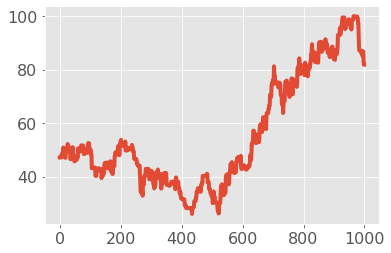

In [41]:
plt.plot(gb.traces['tau_sq_1s'][:,5]);


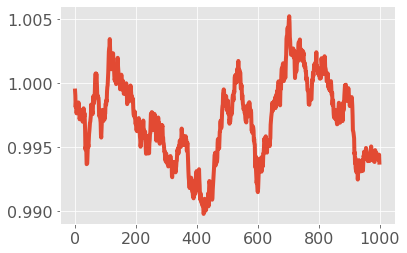

In [26]:
plt.plot(gb.traces['betas'][:,2,3]);
#plt.plot(gb.traces['betas'][:,1,20]*5000);
#plt.xlim(1000)
#plt.ylim(0.945, 0.960)

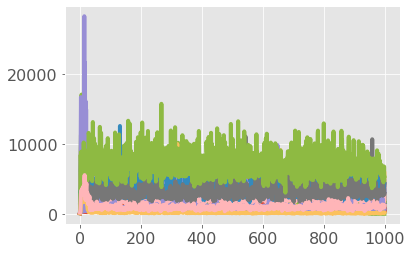

In [27]:
plt.plot(gb.traces['sigmas_squared']);


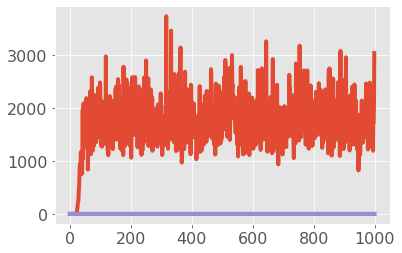

In [28]:
plt.plot(gb.traces['taus']);

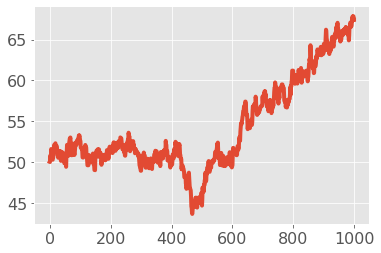

In [8]:
plt.plot(gb.traces['tau_sq_1s'][:,40]);

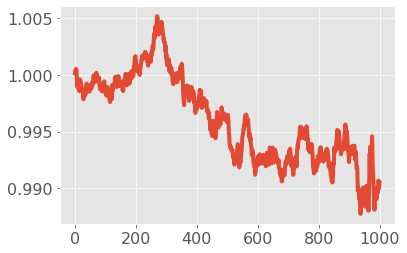

In [9]:
plt.plot(gb.traces['betas'][:,2,16]);

In [10]:
from scipy.stats import uniform
uniform(0,1).logpdf(5)

-inf

In [11]:
gb.sigmas_squared

array([ 380.34376502,  981.81966241, 4789.99031661, 1387.11489087,
       1436.79275337,  899.56720382, 1474.09151084,  441.75639263,
       2513.42306533,  885.81334775, 2247.66902884, 1215.21421656,
       4486.98341716, 1141.1969528 ,  757.04360664, 1532.73333073,
        929.64094229, 1606.83283188, 5789.93914471,   17.77677766,
       1798.28165062, 4229.96003293, 2541.44426951, 1047.84452249,
        575.34118099, 1027.20585778, 1018.90877053, 1158.29371155,
        368.56971495, 2748.20772007, 1844.29406551, 1627.73443844,
       2531.75325663, 1826.31455165, 2801.04150435,  764.57894396,
       4284.24686435,  801.66816941, 2904.38030424,  197.17845547,
       5375.83981485, 1171.49178141])

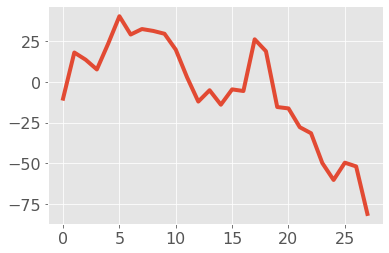

In [12]:
plt.plot(gb.f[3])

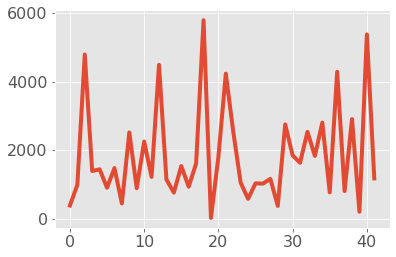

In [13]:
plt.plot(gb.sigmas_squared)

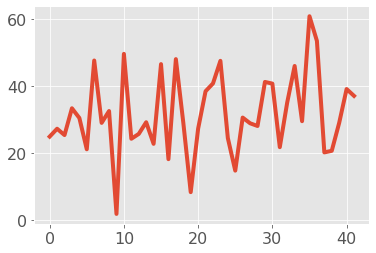

In [14]:
plt.plot(gb.bandwidths)

In [15]:
import pickle
with open('../python_code/traces11.pickle', 'rb') as handle:
    traces1 = pickle.load(handle)
with open('../python_code/traces22.pickle', 'rb') as handle:
    traces2 = pickle.load(handle)
#with open('../python_code/traces3.pickle', 'rb') as handle:
   # traces3 = pickle.load(handle)
## open('traces3.pickle', 'rb') as handle:
 #   traces4 = pickle.load(handle)

UnpicklingError: pickle data was truncated

In [ ]:
#n=
word = 'tau_sq_1s'
plt.plot(traces1[word][:,10]);
plt.plot(traces2[word][:,n]);
#plt.plot(traces3[word][:,n]);
#plt.plot(traces4[word][:,n]);
#plt.ylim(0,400)

In [ ]:
plt.plot(traces1['betas'][:,0,7]);
#plt.plot(traces2['betas'][:,0,41]);



In [ ]:
plt.plot(traces1['accept_bandwidth'].mean(axis=0))

In [ ]:
all_traces = [traces1, traces2, traces3, traces4]
bandwidths_init = traces2['bandwidths'][-1, :] 
tau_sq_init = traces2['tau_sq_1s'][-1, :]

In [ ]:
#plt.plot(traces2['sigmas_squared'][:,5]);
plt.plot(traces3['sigmas_squared'][:,5]);

#plt.plot(traces2['betas'][:,2,10]);
#plt.plot(traces3['betas'][:,2,10]);
#plt.plot(traces4['betas'][:,2,10]);



#plt.xlim(2000, 7000)
#plt.ylim(-.1,0.1)


In [ ]:
import pickle
for i in range(4):
    gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=10000, burn=0, bandwidth_start=bandwidths_init, tau_sq_1_start=tau_sq_init, f_start=5)
    gb.fit()
    with open(f'traces{i}.pickle', 'wb') as handle:
        pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
plt.plot(gb.traces['bandwidths'][:,18], alpha=.7);

In [ ]:
n_groups = 42

In [ ]:
all_traces = [traces1, traces2, traces3, traces4]


In [ ]:
def get_means(traces, n_groups):
    f = [pd.DataFrame(traces['f'][n][5000:]).dropna(axis=1).mean(axis=1).to_numpy() for n in range(n_groups)]
    betas = np.nanmean(traces['betas'][5000:], axis=0)
    mu = np.nanmean(traces['mu'][5000:], axis=0)
    return f, betas, mu
    

f1, betas1, mu1 = get_means(traces1, n_groups)
f2, betas2, mu2 = get_means(traces2, n_groups)
f3, betas3, mu3 = get_means(traces3, n_groups)
f4, betas4, mu4 = get_means(traces4, n_groups)

In [ ]:
traces2['taus'][2,:]

In [ ]:
(traces4['bandwidths'] > 150).sum()

In [ ]:
#plt.plot(traces1['sigmas_squared'][:,15], alpha=.7);
plt.plot(traces2['bandwidths'][:,10], alpha=.7);
plt.plot(traces3['bandwidths'][:,10], alpha=.7);
plt.plot(traces1['bandwidths'][:,10], alpha=.7);
plt.plot(traces4['bandwidths'][:,10], alpha=.7);
#plt.plot(traces4['sigmas_squared'][:,15], alpha=.7);
#plt.ylim(0,500);

In [ ]:
## plt.plot(traces1['mu'][:,2]);
plt.plot(traces2['mu'][:,2]);
plt.plot(traces3['mu'][:,2]);
plt.plot(traces4['mu'][:,2]);

In [ ]:
def calculate_gelman_rubin_stat(four_traces):
    L = len(four_traces[0])
    J = 4
    chain_means = [np.nanmean(trace) for trace in four_traces]
    grand_mean = np.mean(chain_means)
    B = L*np.var(chain_means, ddof=1)
    within_var = [np.nanvar(trace, ddof=1) for trace in four_traces]
    W = np.mean(within_var)
    return (((L-1)/L * W) + 1/L * B)/W

In [ ]:
four_traces = [trace['mu'][5000:,2] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)


In [ ]:
four_traces = [trace['bandwidths'][5000:, 40] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
four_traces = [traces['f'][12][8, :] for traces in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
traces1['f'][0].shape

In [ ]:
L=20000
J = 4

In [ ]:
var = [np.nanvar(traces['mu'][5000:,], ddof=1) for traces in all_traces]
W = np.mean(var)

In [ ]:
gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=3000, burn=0, bandwidth_start=9, tau_sq_1_start=3000, f_start=0)
gb.fit()

In [ ]:
gb.traces['bandwidths'][gb.traces['bandwidths'] > 100]

In [ ]:
plt.plot(gb.traces['bandwidths']);

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
np.log(1/0)

In [ ]:
np.log(0) + 1

In [ ]:
np.log(0) - np.log(0)

In [ ]:
from scipy.stats import uniform

In [ ]:
np.log(uniform.rvs()) > -np.inf